<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>
<h1><center><font size=6>Artificial Intelligence and Machine Learning</center></font></h1>
<h2><center>Customer Segmentation: Hierarchical Clustering and Dimensionality Reduction</center></h2>

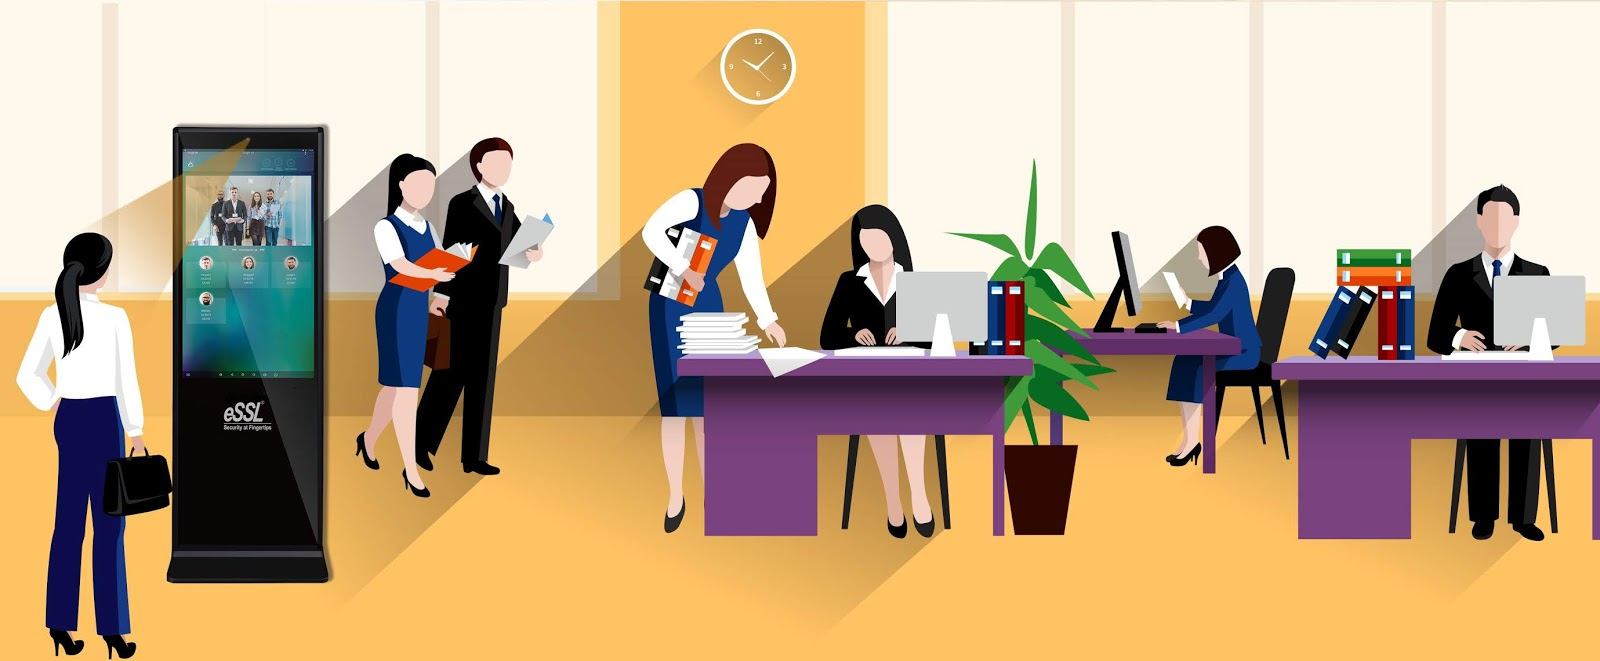

<h1><font color='blue', size="6"><strong>Description</strong></font></h1>

<h2>Context</h2>

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have
been advised by their marketing research team, that the penetration in the market can be
improved. Based on this input, the Marketing team proposes to run personalized campaigns to
target new customers as well as upsell to existing customers. Another insight from the market
research was that the customers perceive the support services of the bank poorly. Based on this,
the Operations team wants to upgrade the service delivery model, to ensure that customer
queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to
the Data Science team for help

<h2>Objective</h2>

To identify different segments in the existing customer, based on their spending patterns as well
as past interaction with the bank, using clustering algorithms, and provide recommendations to
the bank on how to better market to and service these customers.

<h2>Data Description</h2>
    
The data provided is of various customers of a bank and their financial attributes like credit limit,
the total number of credit cards the customer has, and different channels through which
customers have contacted the bank for any queries (including visiting the bank, online and
through a call center).

<h2>Data Dictionary</h2>

* Sl_No: Primary key of the records
* Customer Key: Customer identification number
* Average Credit Limit: Average credit limit of each customer for all credit cards
* Total credit cards: Total number of credit cards possessed by the customer
* Total visits bank: Total number of visits that customer made (yearly) personally to the bank
* Total visits online: Total number of visits or online logins made by the customer (yearly)
* Total calls made: Total number of calls made by the customer to the bank or its customer
service department (yearly)


# Import Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import (
    KElbowVisualizer,
    SilhouetteVisualizer,
)
from yellowbrick.cluster import KElbowVisualizer

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [6]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  # Pairwise distribution between data points

In [7]:
# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

In [8]:
# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# to display and store Matplotlib plots within a Python Jupyter notebook
%matplotlib inline

# enable retina display
%config InlineBackend.figure_format='retina'

# set style similar to ggplot in R
plt.style.use("ggplot")

<IPython.core.display.Javascript object>

In [9]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))

<IPython.core.display.Javascript object>

In [10]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

np.set_printoptions(edgeitems=20, linewidth=100)
np.set_printoptions(suppress=True)
pd.set_option("expand_frame_repr", False)

sns.set_style(style="darkgrid")

<IPython.core.display.Javascript object>

# Import Dataset

In [11]:
df = pd.read_excel("Credit_Card_Customer_Data.xlsx")
data = df.copy()

<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Data background and contents</strong></font></h2>

In [12]:
# show first 5 rows
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [13]:
# show last 5 rows
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [14]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

* The dataset contains 660 records and 7 columns

In [15]:
# The serial no. and Customer Key column does not provide any information
dataAttr = data.iloc[:, 2:]

<IPython.core.display.Javascript object>

In [16]:
# First 5 rows of the data attributes
dataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


<IPython.core.display.Javascript object>

In [17]:
# Last 5 rows of the data attributes
dataAttr.tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0
659,167000,9,0,12,2


<IPython.core.display.Javascript object>

In [18]:
# data info of the dataset attributes
dataAttr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB


<IPython.core.display.Javascript object>

* All data types are of int64 type.

In [19]:
dataAttr.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


<IPython.core.display.Javascript object>

* The `'Avg_Credit_Limit'` is 34,574.
* The **`median`** of `'Total_Credit_Cards'` is 5 CC per user.
* The **`median`** of `'Total_visits_bank'` and `'Total_visits_online'` is 2 visits per user.
* The user makes almost 4 (`'Total_calls_made'`) calls in average.

<h2><font color='blue', size="5"><strong>Univariate Analysis</strong></font></h2>

Univariate data visualization plots help us comprehend the descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

## Plotting functions

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


def histogram_boxplot(data, feature, figsize=(16, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<h3>Avg_Credit_limit</h3>

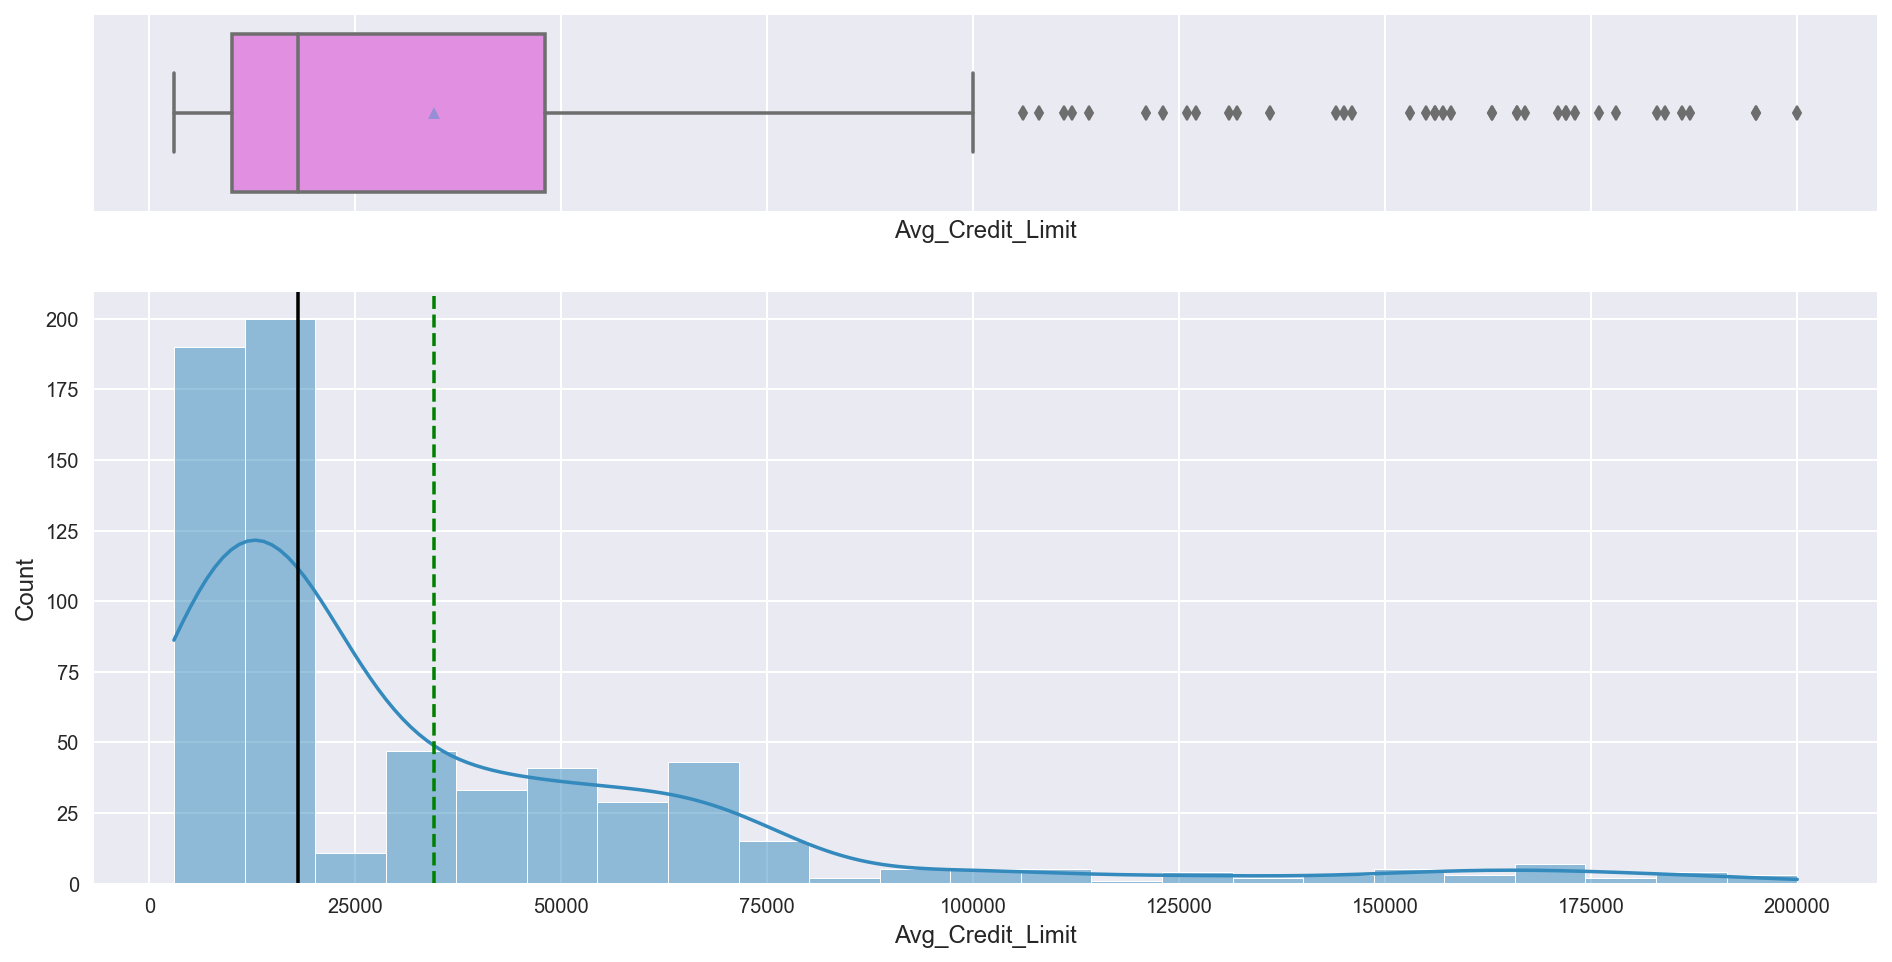

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(dataAttr, "Avg_Credit_Limit", kde=True)

* For the `'Avg_Credit_Limit'` we found lots of outliers and a right-skewed distribution showing a slightly double hump, as a signal of a multimodal distribution.

### `'Total_Credit_Cards'`, `'Total_visits_bank'`, `'Total_visits_online'`, and `'Total_calls_made'`

In [22]:
# list of numerical columns
num_col = dataAttr.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

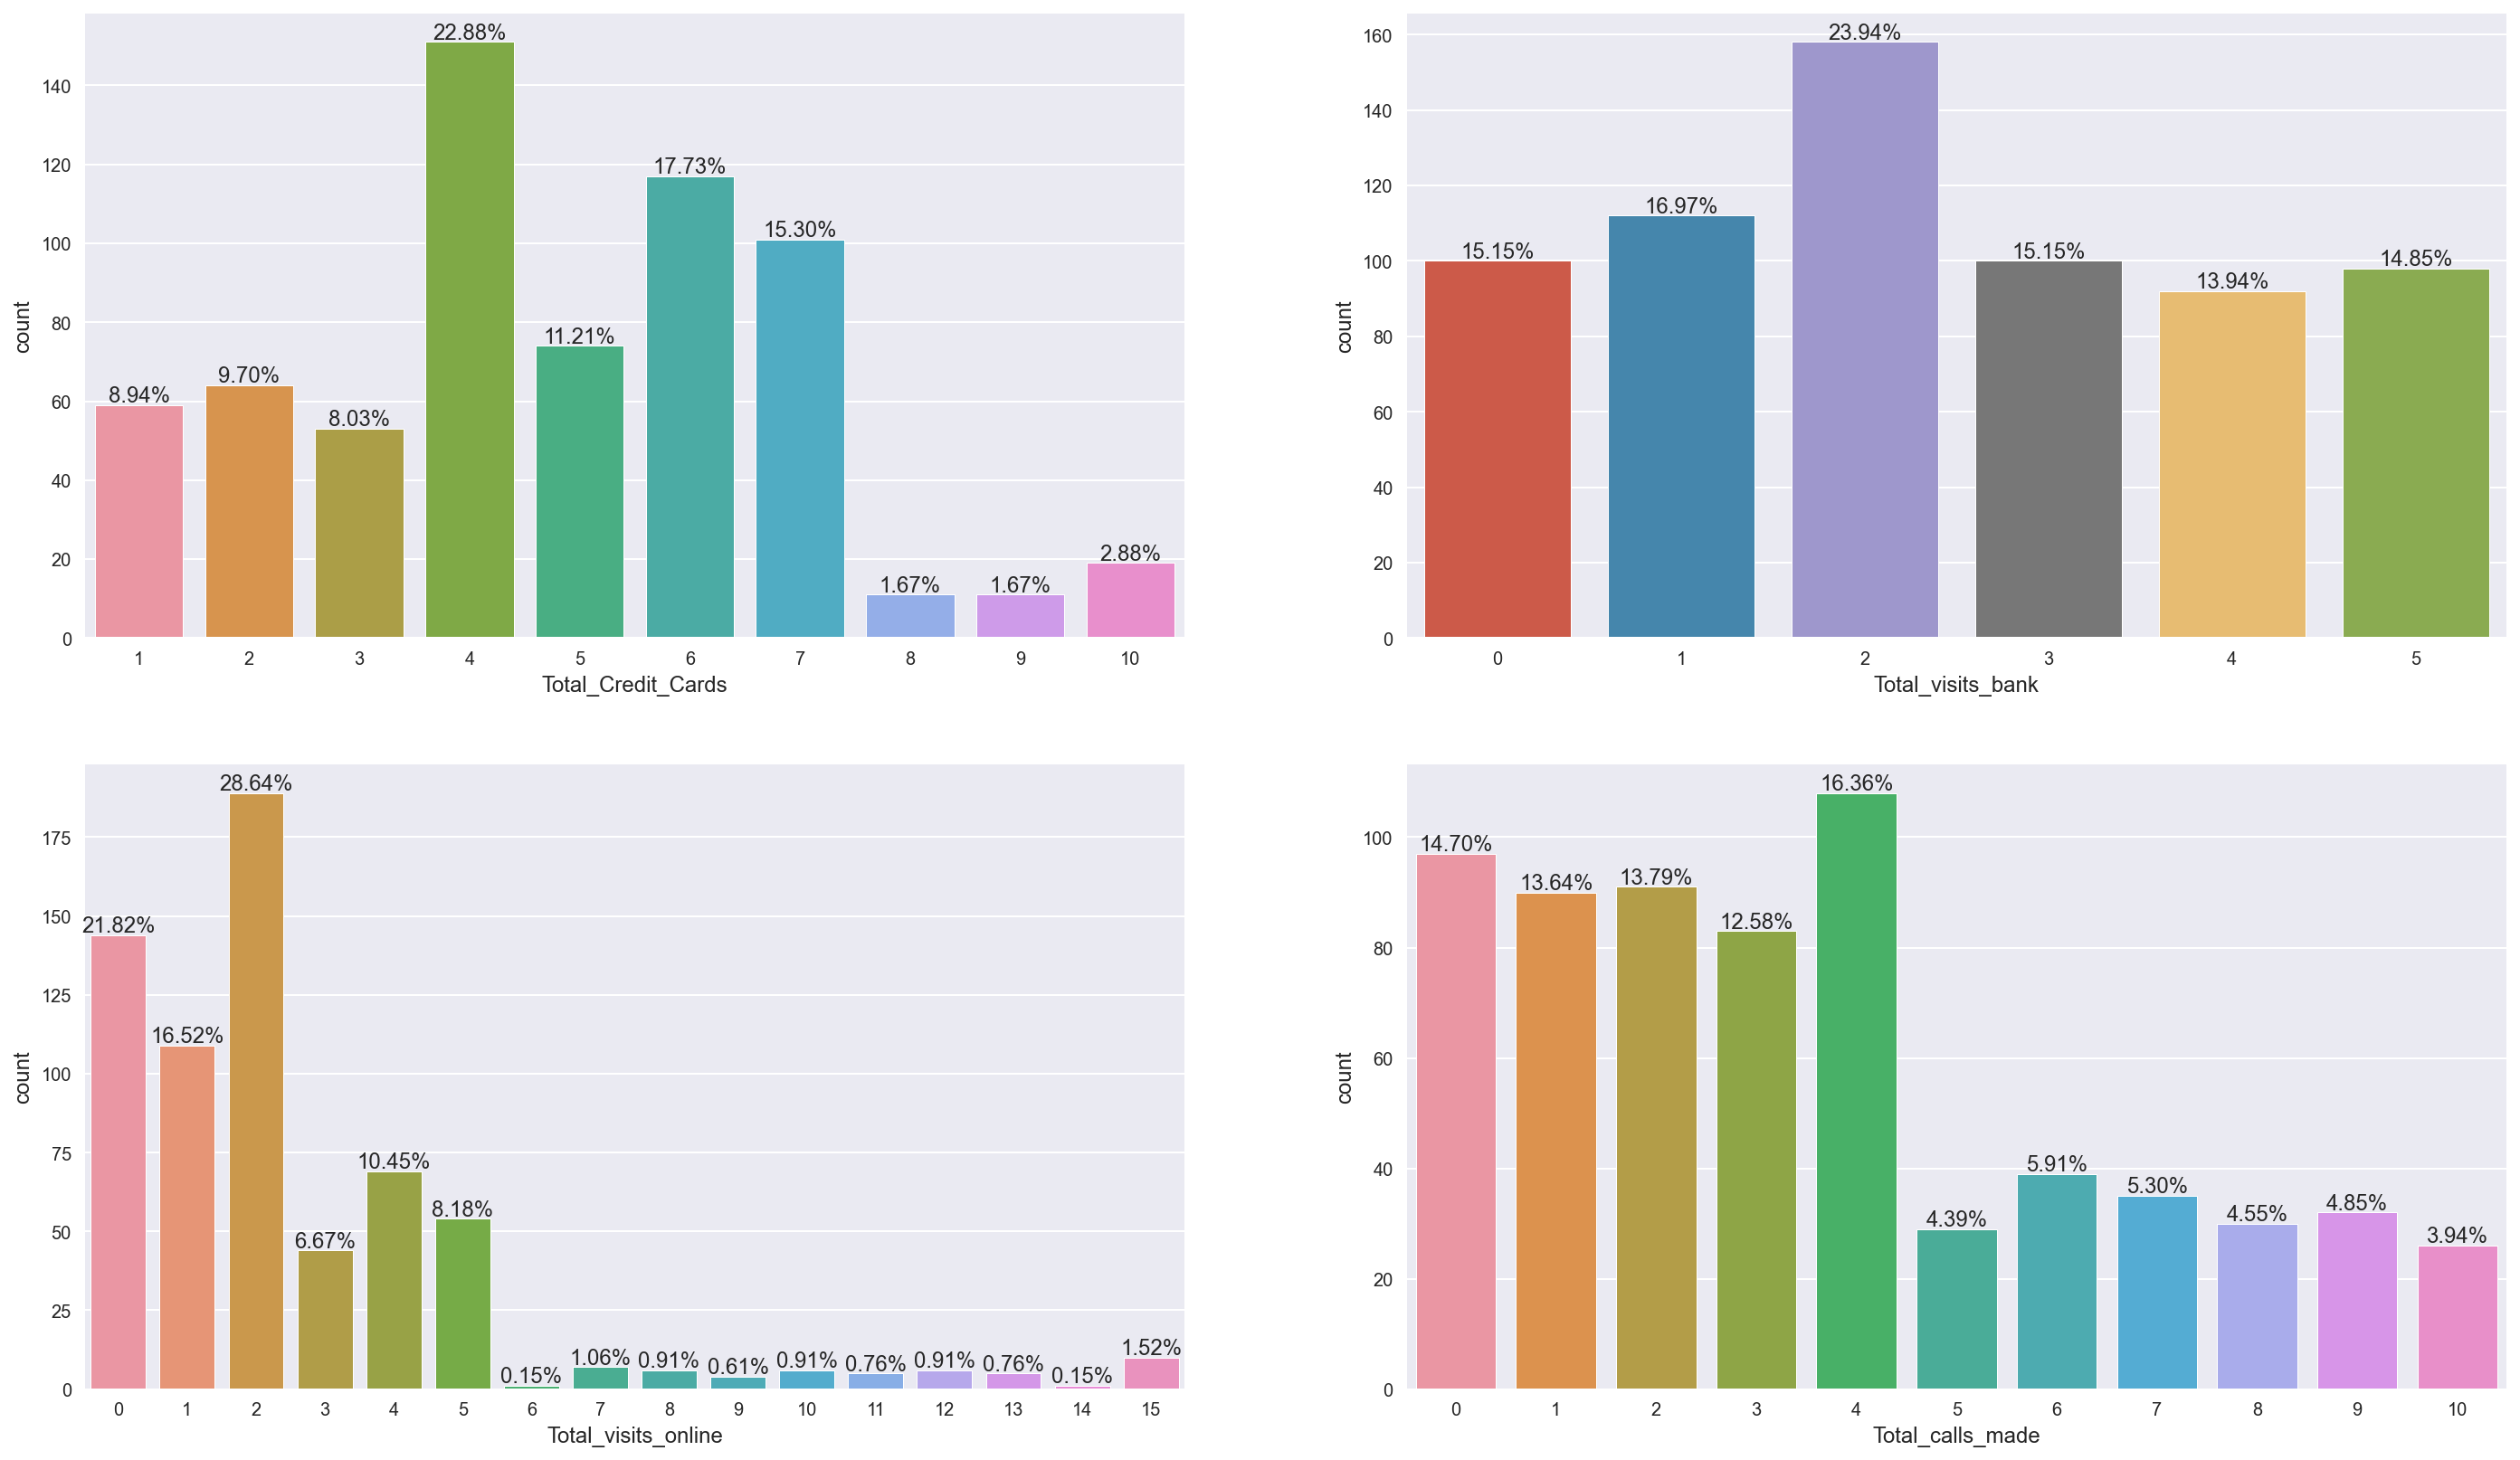

<IPython.core.display.Javascript object>

In [23]:
# function to display a multi-subplots showing percentages of occurences
nrows = 2
ncols = 2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(24, 14))
for idx in range(len(num_col[1:])):
    row = idx // nrows
    col = idx % ncols
    feature = num_col[idx]
    total = len(dataAttr[feature])  # length of the column
    count = dataAttr[feature].nunique()
    sns.countplot(x=dataAttr[num_col[1:][idx]], data=dataAttr, ax=axs[row, col])
    for p in axs[row, col].patches:
        label = "{:.2f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        axs[row, col].annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
# axs[-1, -1].axis("off")
plt.show()

Observations:
* The **`most frequent`** `'Total_Credit_Cards'` is 4 credit cards with almost 23%.
* The **`most frequent`** number of `'Total_visits_bank'` is almost 24%.
* The highest frequency of `'Total_visits_online'` is 2 visits with almost 28.6%, followed by None-visits at 21.8%.
* The user most frequently makes `'Total_calls_made'` calls a 16.4% of the time, followed by a frequency between 0-3 with a decreasing percentage of 14.7% to 12.6% of the time.

<h2><font color='blue', size="5"><strong>Bivariate Analysis</strong></font></h2>

The analysis is related to the relationship between the two variables to understand their interaction with each other.

Different types of Bivariate Analysis that can be done:

* Bivariate Analysis of two Numerical Variables
* Bivariate Analysis of two Categorical Variables
* Bivariate Analysis of one Numerical Variables and one Categorical Variable


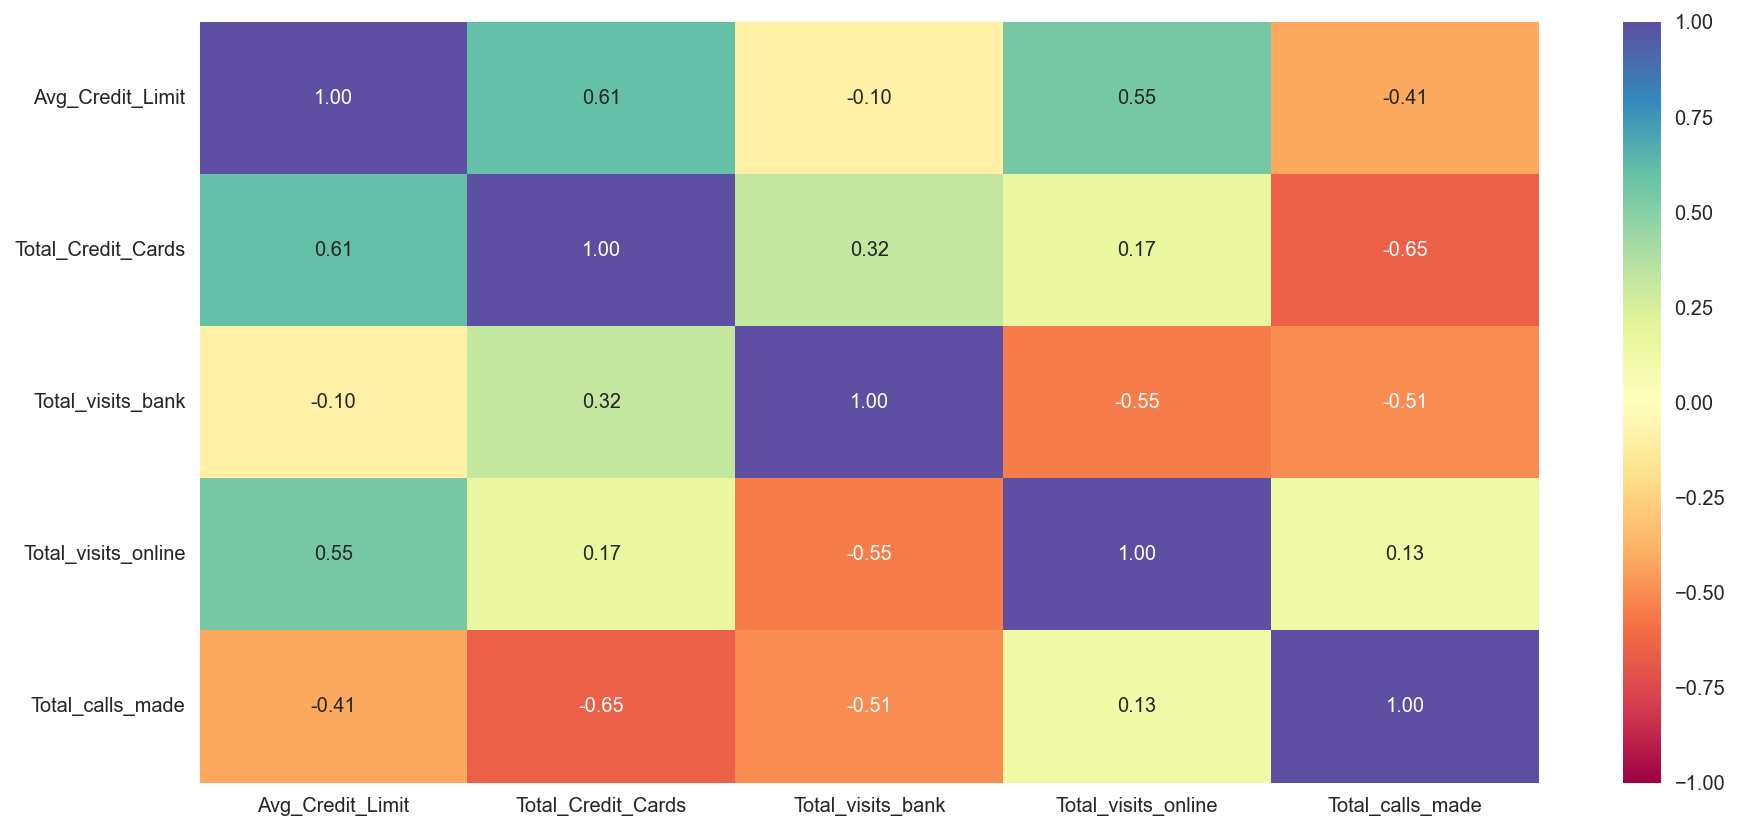

<IPython.core.display.Javascript object>

In [24]:
# Check for correlation among numerical variables
corr = dataAttr[num_col].corr()

# plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations

* The highest positive correlation at **+0.61** is between `'Total_Credit_Cards'` and `'Avg_Credit_Limit'`.
* The highest negative correlation at **-0.65** is between `'Total_Credit_Cards'` and `'Total_calls_made'`.
* The second highest positive correlation at **+0.55** is between `'Total_Credit_Cards'` and `'Total_visits_online'`.
* The second highest negative correlation at **-0.55** is between `'Total_visits_online'` and `'Total_visits_bank'`.

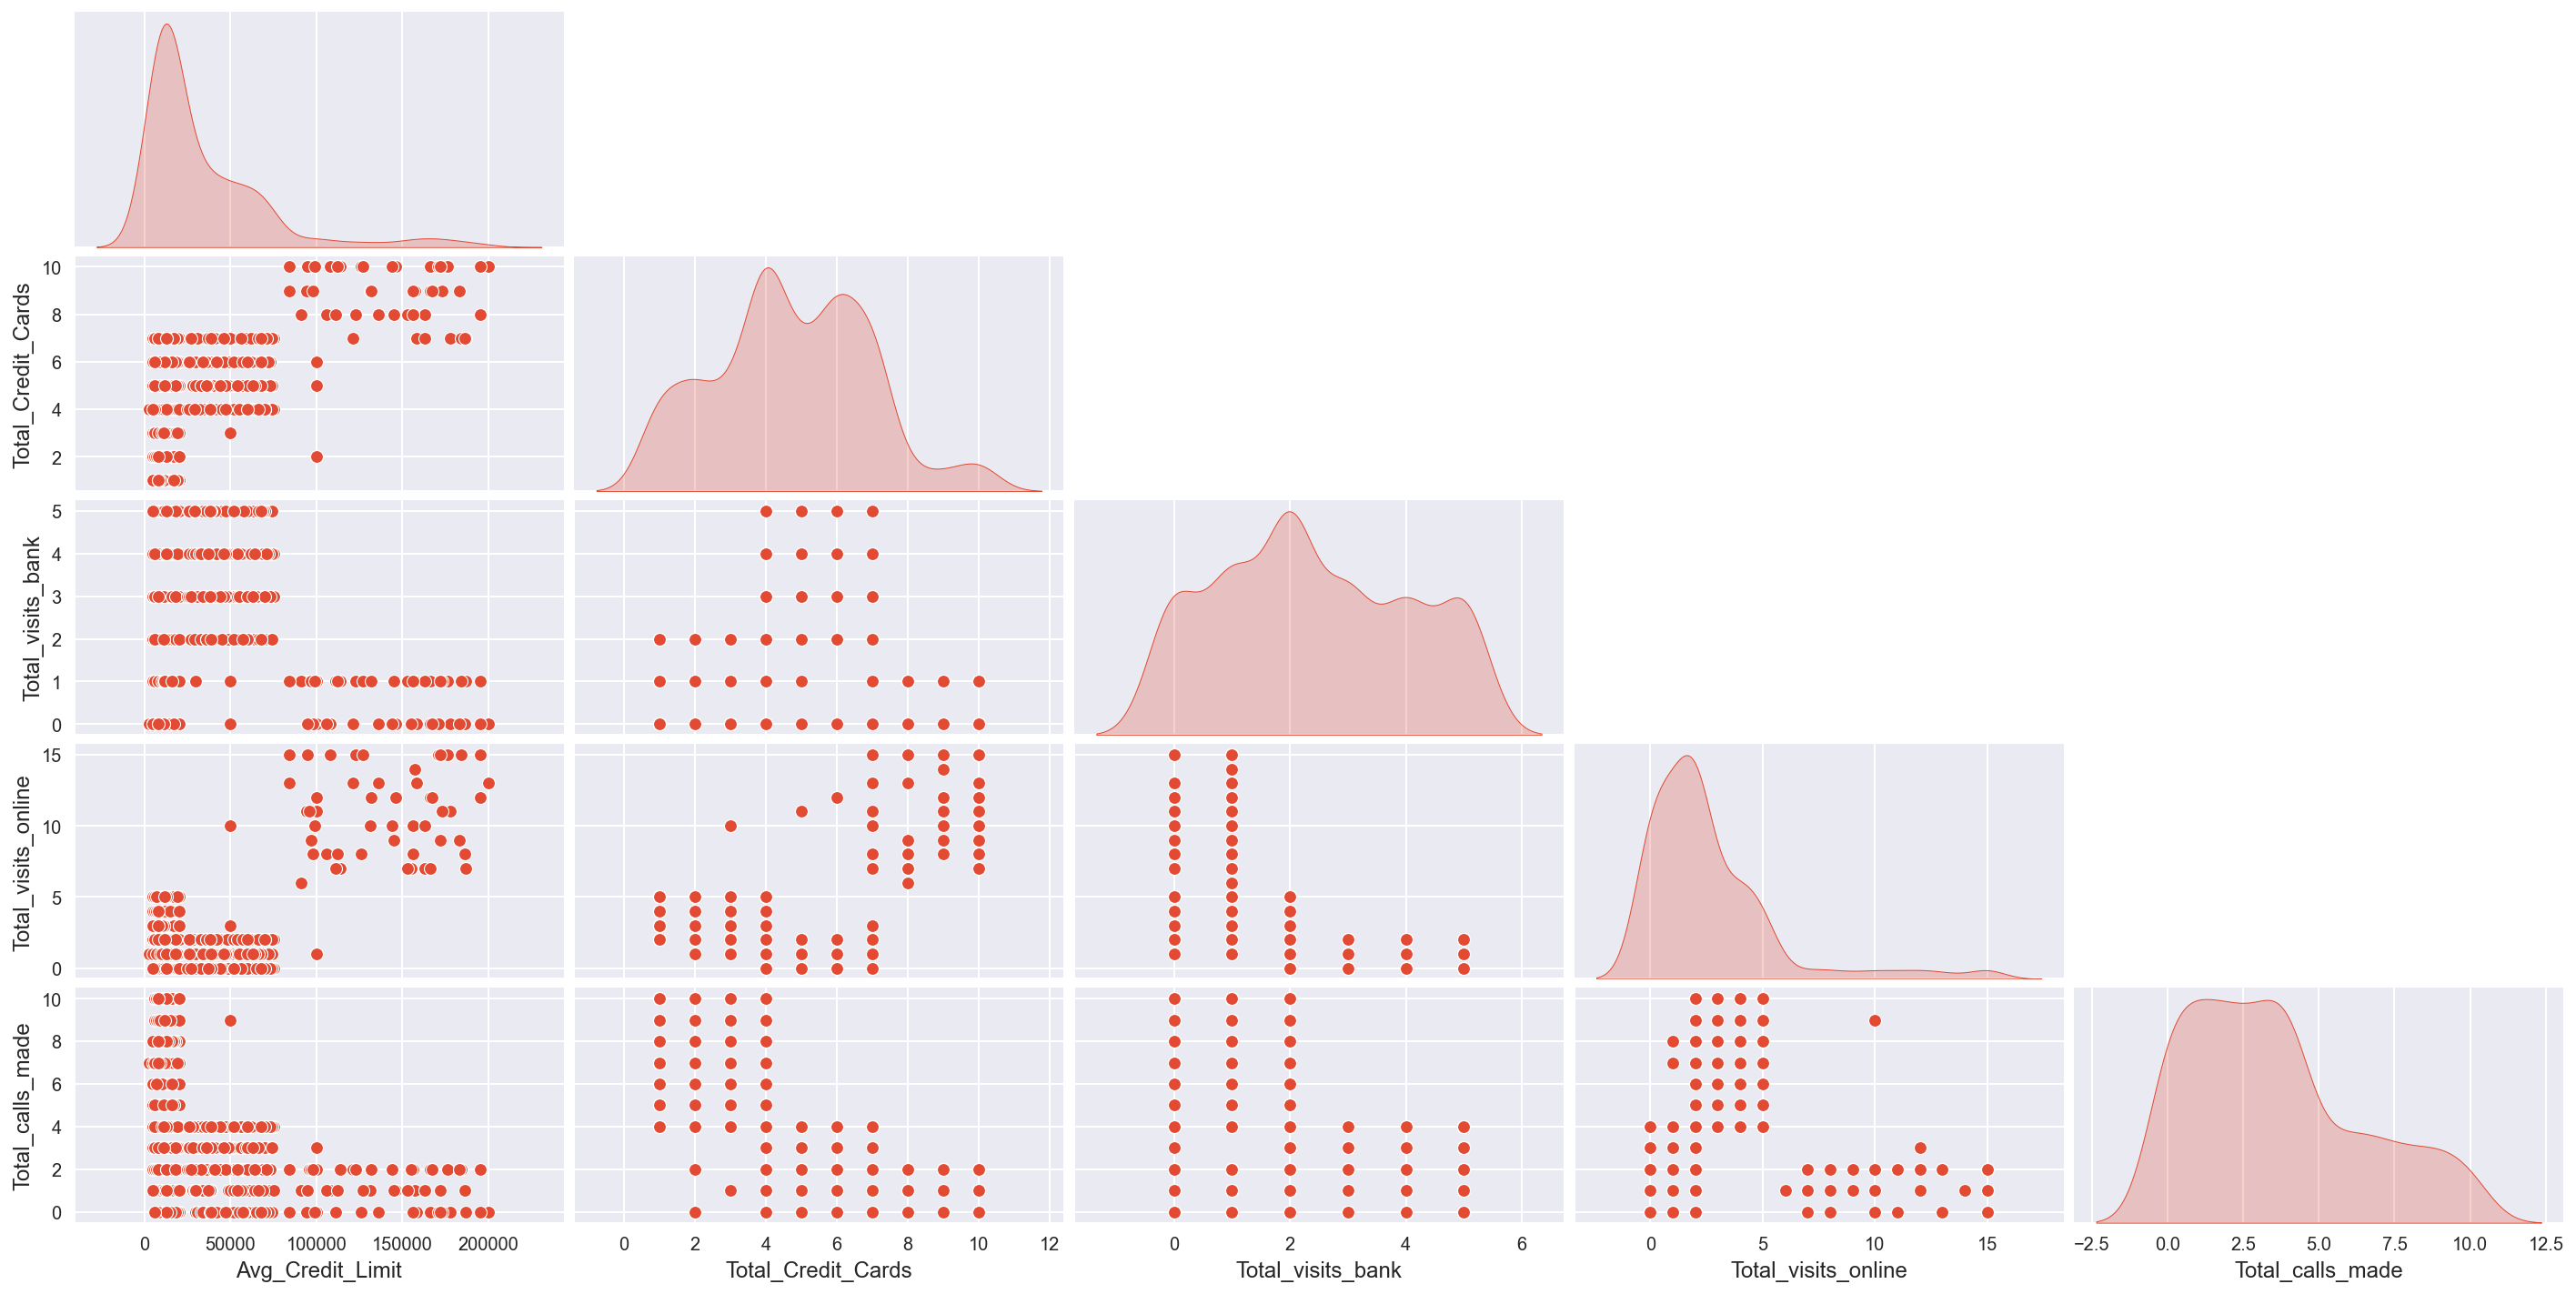

<IPython.core.display.Javascript object>

In [25]:
# using a variant of the `pairplot` known as `corner` plot to show relationships between pairs
sns.pairplot(data=df[num_col], height=2, aspect=2, diag_kind="kde", corner=True)
plt.show()

* The pair plot helps to identify the shape of the distribution and the interrelationships between pairs of features in the data.
* Also can help to visualize potential clusters of data based on that interrelationship between features.
* Furthermore, we can identify potential outliers of clusters present in the data like in the case of isolated points as `'Total_visits_online'` versus `'Total_calls_made'`

### Avg_Credit_Limit and Total_visits_online

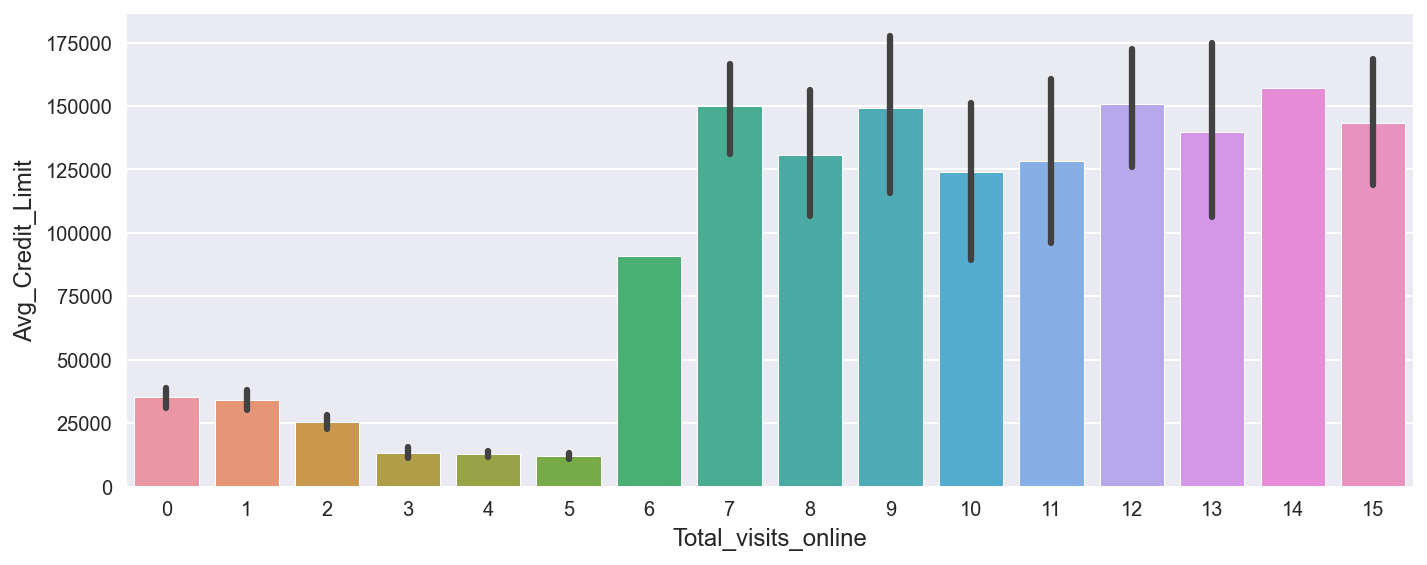

<IPython.core.display.Javascript object>

In [26]:
ax = sns.catplot(
    x="Total_visits_online",
    y="Avg_Credit_Limit",
    data=dataAttr,
    kind="bar",
    height=4,
    aspect=10 / 4,
)
# ax.set_xticklabels(rotation=0)
plt.show()

* There marked differences between two groups in the relationship between average credit limit and total visits online.
* The first group shows that when customers made between 7-15 total visits online then the average credit limit is between 90k-175k with a very high dispersion, probably due to outliers or extreme values.
* The second group happens with 0-5 total visits online and a 0-40k average credit limit with a very tiny dispersion, which may indicate a more compact cluster of data.

### Avg_Credit_Limit and Total_Credit_Cards

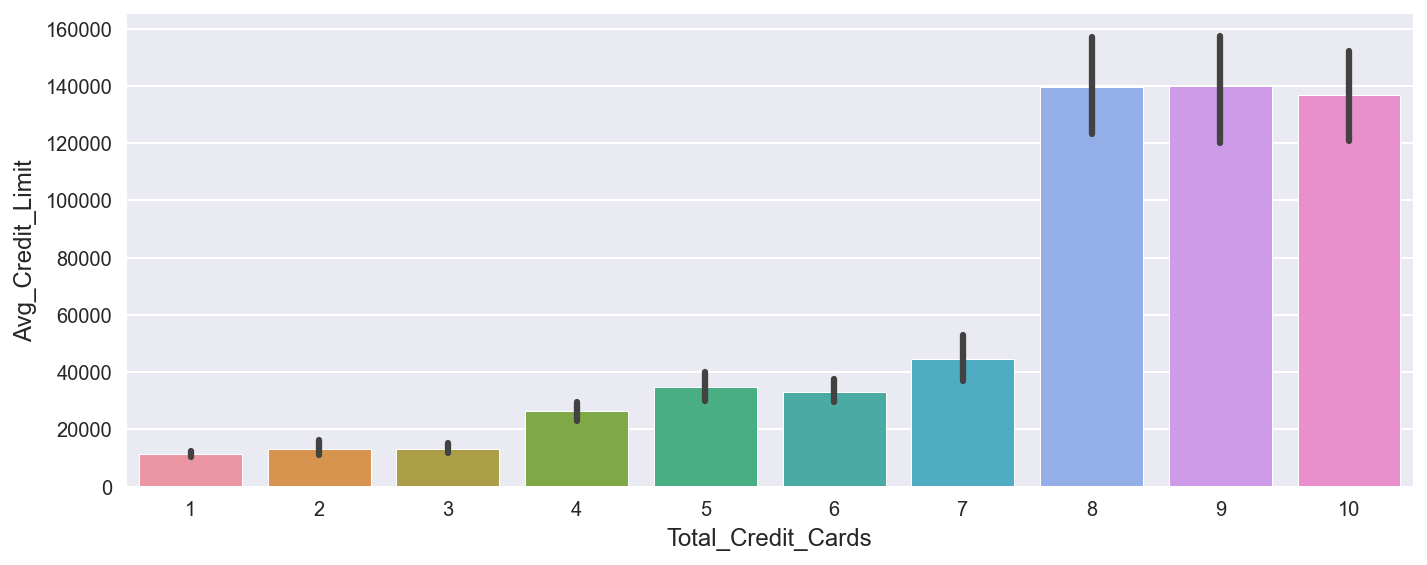

<IPython.core.display.Javascript object>

In [27]:
ax = sns.catplot(
    x="Total_Credit_Cards",
    y="Avg_Credit_Limit",
    data=dataAttr,
    kind="bar",
    height=4,
    aspect=10 / 4,
)
# ax.set_xticklabels(rotation=0)
plt.show()

* There is a clear group of customers with 8-10 total credit cards where the average credit limit lies between 120k-160K and a high dispersion.
* Another group is identified where customers with 1-7 total credit cards shows an average credit limit between 0-50k with a lower dispersion.

### Total_Credit_Cards and Total_calls_made

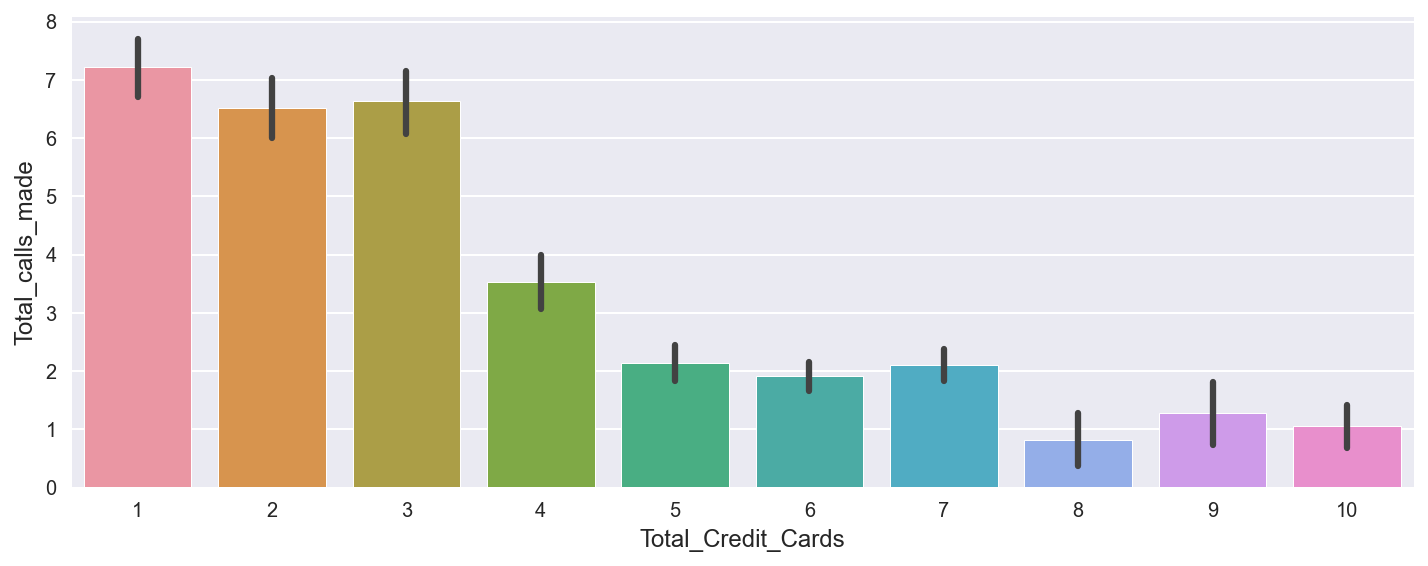

<IPython.core.display.Javascript object>

In [28]:
ax = sns.catplot(
    x="Total_Credit_Cards",
    y="Total_calls_made",
    data=dataAttr,
    kind="bar",
    height=4,
    aspect=10 / 4,
)
# ax.set_xticklabels(rotation=0)
plt.show()

* Using the catplot and the pairplot above we can certainly identify two groups in the interaction `'Total_Credit_Cards'` and `'Total_calls_made'`
* The first group shows up when total call made goes from 6-7 and the total credit cards are 1-3.
* The second group shows that when total calls made is between 0-2 the total credit cards lies between 5-10.
* There is an isolated group with 3-4 total calls made for customers with 4 total credit cards.

### Total_Credit_Cards and Total_visits_online

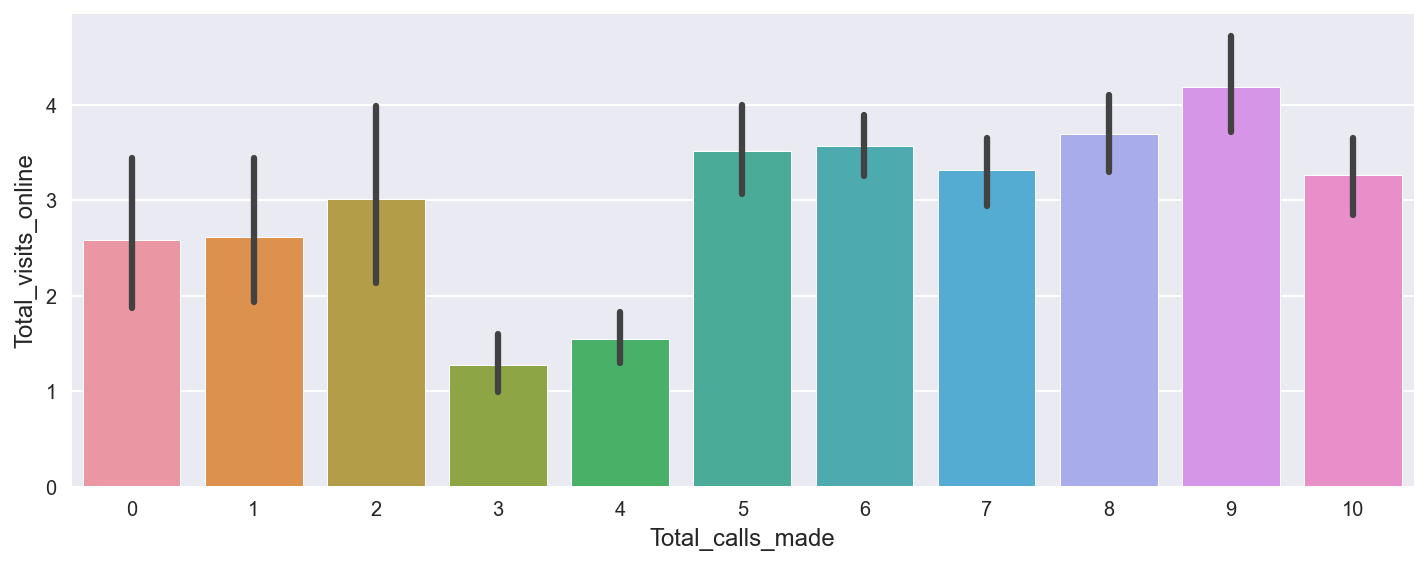

<IPython.core.display.Javascript object>

In [29]:
ax = sns.catplot(
    x="Total_calls_made",
    y="Total_visits_online",
    data=dataAttr,
    kind="bar",
    height=4,
    aspect=10 / 4,
)
# ax.set_xticklabels(rotation=0)
plt.show()

* It can be said we identify 3 groups in the cross-relationship between `'Total_visits_online'` and `'Total_calls_made'`
* When total visits online are between 2 and 3 we identify a group with 0-3 calls made. This group shows a high dispersion.
* When total visits online is 1-2 we have a group with 3-4 total calls made and a lower dispersion.
* And definitely when total visits online are between 3-4 the total calls made goes from 5-10 with a relative moderate dispersion.

<h2><font color='blue', size="5"><strong>Insights based on EDA</strong></font></h2>

* The `'Avg_Credit_Limit'` is 34,574.
* The **`median`** of `'Total_Credit_Cards'` is 5 CC per user.
* The **`median`** of `'Total_visits_bank'` and `'Total_visits_online'` is 2 visits per user.
* The user makes almost 4 (`'Total_calls_made'`) calls in average.
* For the `'Avg_Credit_Limit'` we found lots of outliers and a right-skewed distribution showing a slightly double hump, as a signal of a multimodal distribution.
* The **`most frequent`** `'Total_Credit_Cards'` is 4 credit cards with almost 23%.
* The **`most frequent`** number of `'Total_visits_bank'` is almost 24%.
* The highest frequency of `'Total_visits_online'` is 2 visits with almost 28.6%, followed by None-visits at 21.8%.
* The user most frequently makes `'Total_calls_made'` calls a 16.4% of the time, followed by a frequency between 0-3 with a decreasing percentage of 14.7% to 12.6% of the time.
* The highest positive correlation at **+0.61** is between `'Total_Credit_Cards'` and `'Avg_Credit_Limit'`.
* The highest negative correlation at **-0.65** is between `'Total_Credit_Cards'` and `'Total_calls_made'`.
* The second highest positive correlation at **+0.55** is between `'Total_Credit_Cards'` and `'Total_visits_online'`.
* The second highest negative correlation at **-0.55** is between `'Total_visits_online'` and `'Total_visits_bank'`.
* The pair plot helps to identify the shape of the distribution and the interrelationships between pairs of features in the data.
* Also can help to visualize potential clusters of data based on that interrelationship between features.
* Furthermore, we can identify potential outliers of clusters present in the data like in the case of isolated points as `'Total_visits_online'` versus `'Total_calls_made'`
* There marked differences between two groups in the relationship between average credit limit and total visits online.
* The first group shows that when customers made between 7-15 total visits online then the average credit limit is between 90k-175k with a very high dispersion, probably due to outliers or extreme values.
* The second group happens with 0-5 total visits online and a 0-40k average credit limit with a very tiny dispersion, which may indicate a more compact cluster of data.
* There is a clear group of customers with 8-10 total credit cards where the average credit limit lies between 120k-160K and a high dispersion.
* Another group is identified where customers with 1-7 total credit cards shows an average credit limit between 0-50k with a lower dispersion.
* Using the catplot and the pairplot above we can certainly identify two groups in the interaction `'Total_Credit_Cards'` and `'Total_calls_made'`
* The first group shows up when total call made goes from 6-7 and the total credit cards are 1-3.
* The second group shows that when total calls made is between 0-2 the total credit cards lies between 5-10.
* There is an isolated group with 3-4 total calls made for customers with 4 total credit cards.
* It can be said we identify 3 groups in the cross-relationship between `'Total_visits_online'` and `'Total_calls_made'`
* When total visits online are between 2 and 3 we identify a group with 0-3 calls made. This group shows a high dispersion.
* When total visits online is 1-2 we have a group with 3-4 total calls made and a lower dispersion.
* And definitely when total visits online are between 3-4 the total calls made goes from 5-10 with a relative moderate dispersion.

<h1><font color='darkgreen', size="6"><strong>Data Preprocessing</strong></font></h1>

<h2><font color='blue', size="5"><strong>Prepare the data for analysis</li></strong></font></h2>

In [30]:
dataAttr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Missing value treatment</li></strong></font></h2>

In [31]:
dataAttr.isnull().sum()

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

* There is no missing values in the original dataset.

<h2><font color='blue', size="5"><strong>Feature Engineering</li></strong></font></h2>

* In particular, we will do Feature scaling which is a class of statistical techniques that, as the name implies,   
  scales the features of our data so that they all have a similar range.
* Feature scaling is specially relevant in machine learning models that compute some sort of distance metric, like   
  most clustering methods like K-Means.
* The ultimate goal to perform scaling is to bring down all the features to a common scale without distorting the   
  differences in the range of the values.

In [32]:
# scaling the data Attributes
dataScaled = dataAttr.apply(zscore)
dataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Duplicated observations check</li></strong></font></h2>

In [33]:
# Review if Customer Key has duplicated keys
data[data["Customer Key"].duplicated(keep=False)].sort_values(by="Customer Key")

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


<IPython.core.display.Javascript object>

* The 'Customer Key' is a unique ID given to each customer in the database. The duplicate values might   
  correspond to customer profile changes, and as such, there is no need to delete these records as these  
  are actual occurrences at some point in the time.

In [34]:
# checking for duplicated records/observations from dataAttr
dupIndexes = dataAttr[dataAttr.duplicated(keep=False)].index

<IPython.core.display.Javascript object>

In [35]:
# reviewing duplicated items obtained from the dataAttr in the original dataset
data.loc[dupIndexes].sort_values(
    by=[
        "Avg_Credit_Limit",
        "Total_Credit_Cards",
        "Total_visits_bank",
        "Total_visits_online",
        "Total_calls_made",
    ]
)[:8]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
310,311,83459,5000,4,5,0,1
395,396,31515,5000,4,5,0,1
56,57,32828,6000,1,0,2,5
175,176,20524,6000,1,0,2,5
17,18,96463,8000,2,0,3,4
162,163,80457,8000,2,0,3,4
29,30,29112,8000,4,0,4,7
215,216,18609,8000,4,0,4,7


<IPython.core.display.Javascript object>

* No need to remove duplicated rows as they belongs to different `'Customer Key'`

<h2><font color='blue', size="5"><strong>Outlier treatment</li></strong></font></h2>

In [36]:
# function to find outliers out of the feature
def get_outliers(data, feature, factor=1.5, include_indexes=False):
    """
    function to find outliers

    data: dataframe
    feature: dataframe column
    """
    p25, p50, p75 = values = data[feature].describe().to_numpy()[-4:-1].tolist()
    iqr = p75 - p25
    loww = p25 - iqr * factor
    uppw = p75 + iqr * factor
    filt = (data[feature] > uppw) | (data[feature] < loww)
    if include_indexes == True:
        return data.loc[filt, feature].tolist(), data.loc[filt, feature].index
    return data.loc[filt, feature].tolist(), []

<IPython.core.display.Javascript object>

### On Avg_Credit_Limit

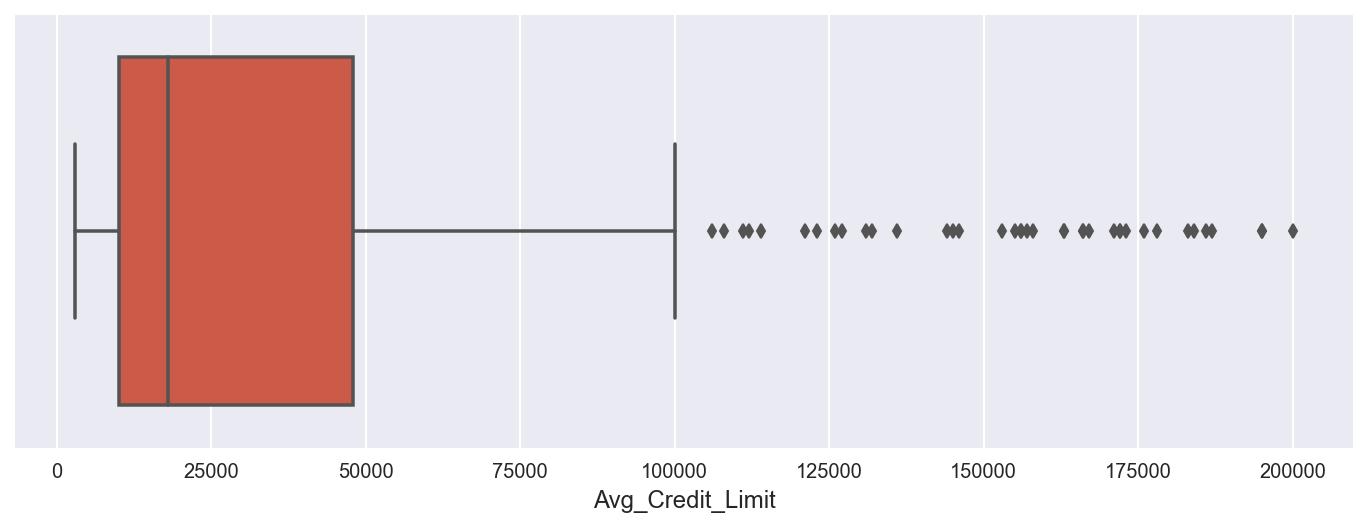

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=dataAttr,
    x="Avg_Credit_Limit",
)
plt.show()

In [38]:
# getting outliers values and location indexes of the outliers
# Note: using a higher `amplitude` for the IQR multiplier of 2.5 instead of the common 1.5
outliers, bad_indexes = get_outliers(
    dataAttr, "Avg_Credit_Limit", factor=2.5, include_indexes=True
)
# number of observations out of range
dataAttr.loc[bad_indexes].shape

(27, 5)

<IPython.core.display.Javascript object>

In [39]:
# showing first 5 outliers on `Avg_Credit_Limit`
dataAttr.loc[bad_indexes].head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
612,157000,9,1,14,1
614,163000,8,1,7,1
619,158000,7,0,13,0
621,166000,9,1,12,2
622,176000,10,1,15,2


<IPython.core.display.Javascript object>

In [40]:
# showing last 5 outliers on `Avg_Credit_Limit`
dataAttr.loc[bad_indexes].tail()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
652,156000,8,1,8,0
654,172000,10,1,9,1
657,145000,8,1,9,1
658,172000,10,1,15,0
659,167000,9,0,12,2


<IPython.core.display.Javascript object>

* As we have found some potential outliers in the dataset we will not remove those observations    
  as they may shed some light in the way the clusters are related/connected.

### On Total_Credit_Cards

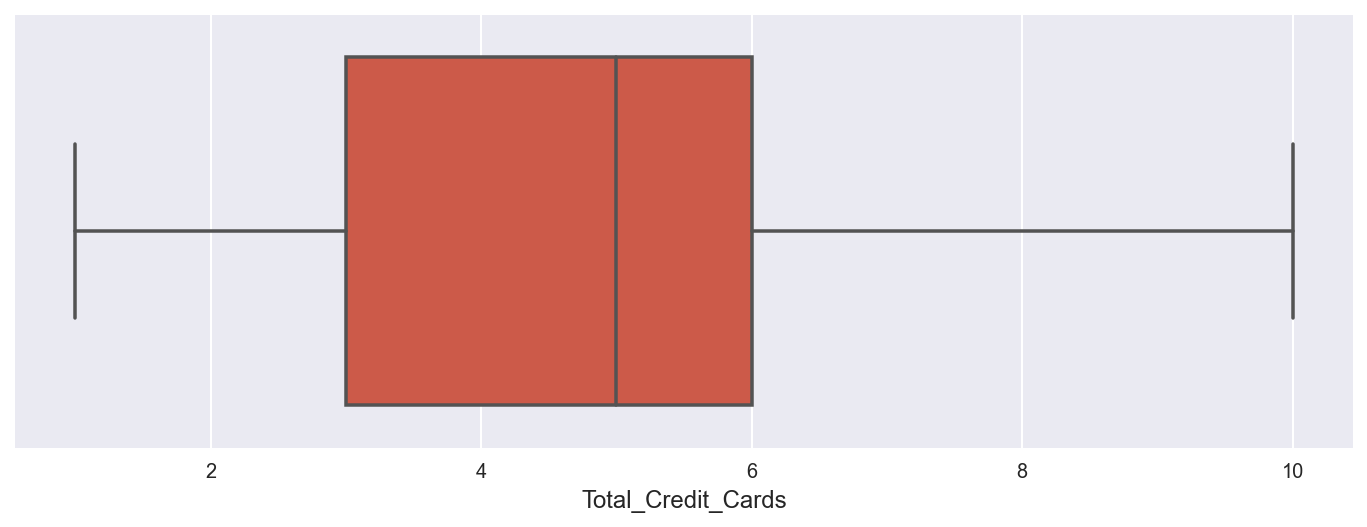

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=dataAttr,
    x="Total_Credit_Cards",
)
plt.show()

### On Total_visits_bank

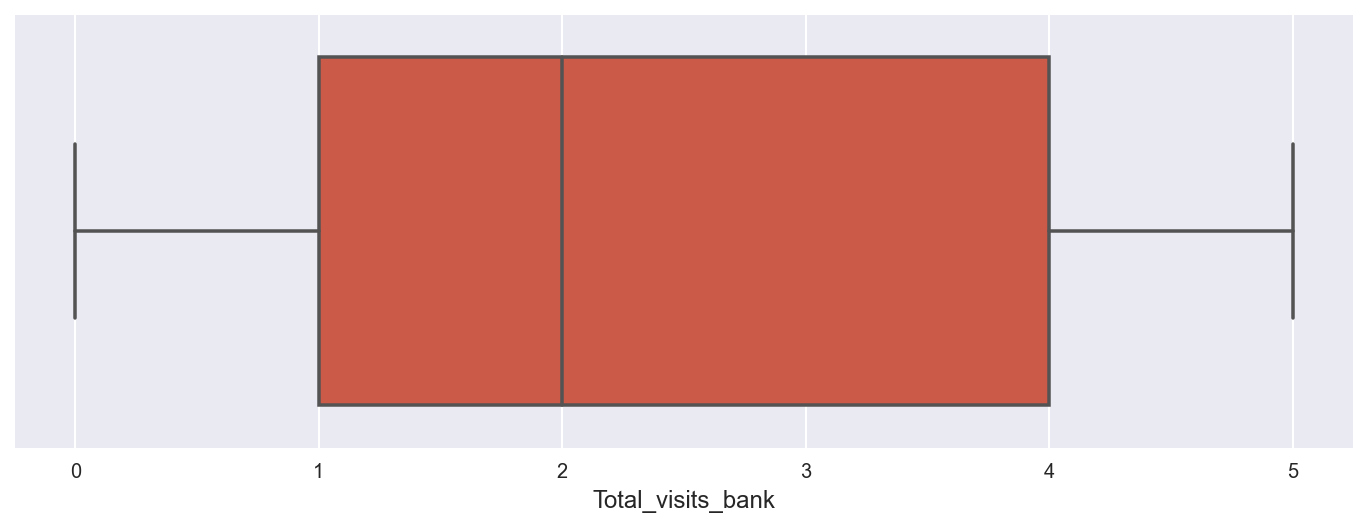

<IPython.core.display.Javascript object>

In [42]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=dataAttr,
    x="Total_visits_bank",
)
plt.show()

* No visible outliers present on this feature.

### On Total_visits_online

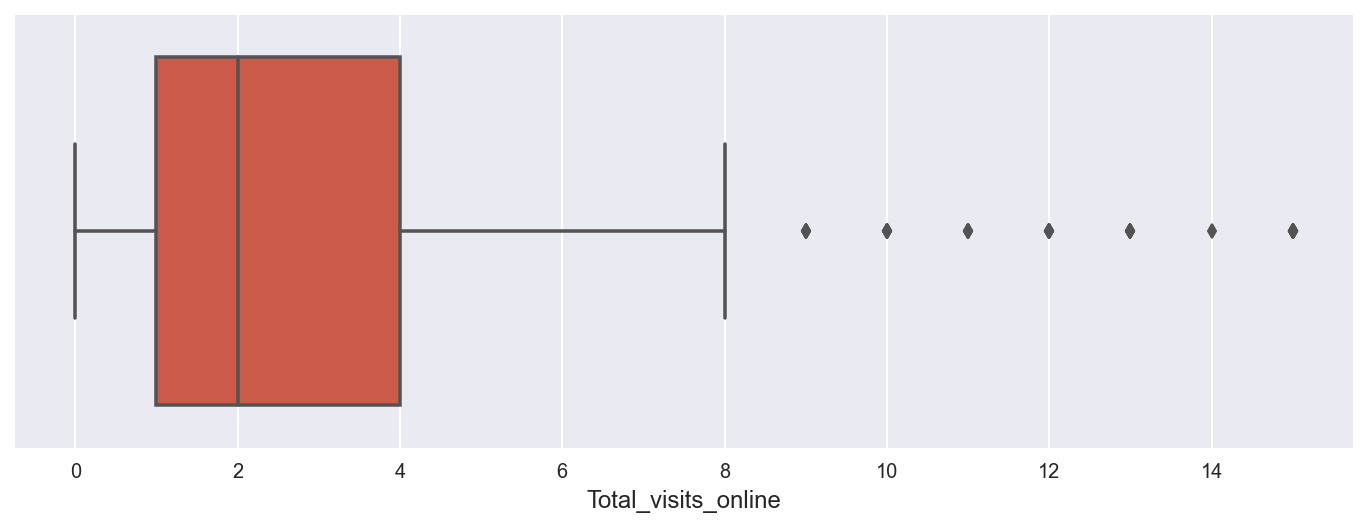

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=dataAttr,
    x="Total_visits_online",
)
plt.show()

In [44]:
# getting outliers values and location indexes of the outliers
# Note: using a higher `amplitude` for the IQR multiplier of 2.5 instead of the common 1.5
outliers, bad_indexes = get_outliers(
    dataAttr, "Total_visits_online", factor=2.5, include_indexes=True
)
# number of observations out of range
dataAttr.loc[bad_indexes].shape

(22, 5)

<IPython.core.display.Javascript object>

* Although we also found some outliers in this feature, we won't remove them as they may shed     
  some light in the clusters conformation.

### On Total_calls_made

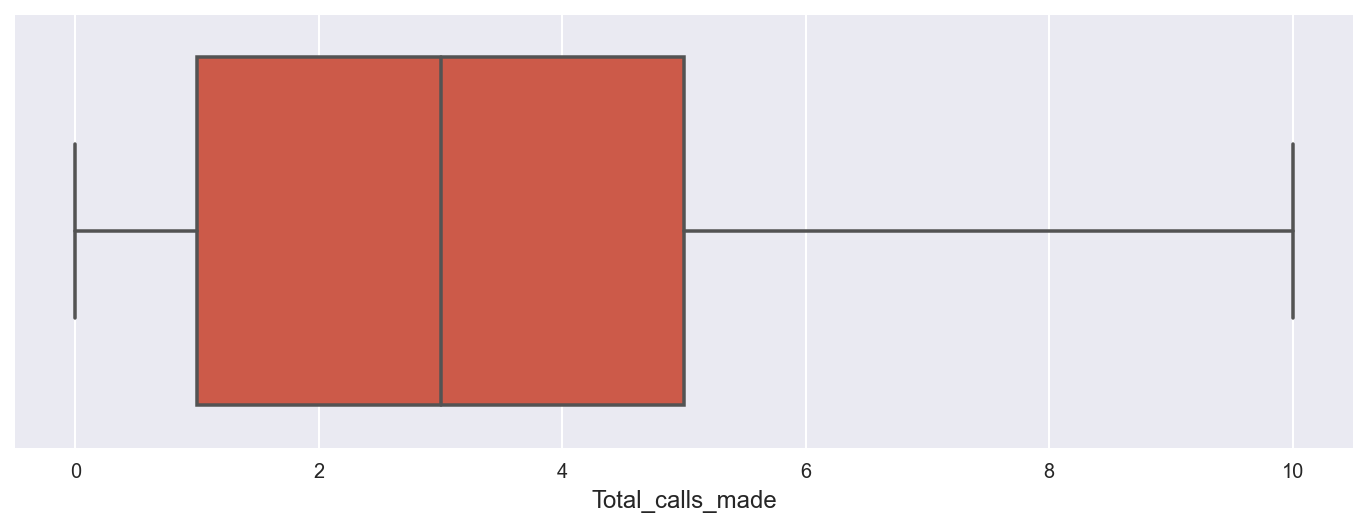

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    data=dataAttr,
    x="Total_calls_made",
)
plt.show()

* No visible outliers present on this feature.

<h1><font color='darkgreen', size="6"><strong>Applying K-means Clustering</strong></font></h1>

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition `'n' observations`    
**into** `'k' clusters` in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid),    
serving as a prototype of the cluster (from Wikipedia [KMeans Clustering](https://en.wikipedia.org/wiki/K-means_clustering)).

<h2><font color='blue', size="5"><strong>Apply K-means Clustering</strong></font></h2>

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine  
the optimal number of groups. For that we conduct the knee test to see where the knee happens.

In [46]:
# Finding optimal no. of clusters
from scipy.spatial.distance import cdist

clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(dataScaled)
    prediction = model.predict(dataScaled)
    meanDistortions.append(
        sum(np.min(cdist(dataScaled, model.cluster_centers_, "euclidean"), axis=1))
        / dataScaled.shape[0]
    )

<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Plot the Elbow curve</strong></font></h2>

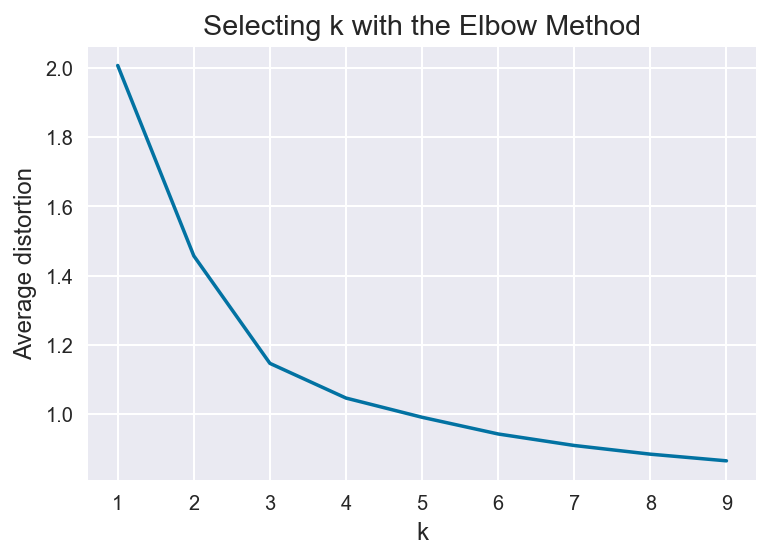

<IPython.core.display.Javascript object>

In [47]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

* The visual of the plot shows that the knee may be located at k = 3. Let's try the `'yellowbricks'` library.

## Using the KElbow Visualizer from `'yellowbricks'`

* The python library `'yellowbrick'` implements the `“elbow”` method to help find the optimal number of clusters through    
the `KElbowVisualizer` method by fitting the model with a range of values for `K`. This can be done through three    
different metrics: `'distortion'`, `'silhouette score'`, and `'calinski_harabasz'`.    

* The default metric is `'distortion'` which computes the sum of squared distances from each point to its assigned center.   

* The `'silhouette score'` calculates the mean Silhouette Coefficient of all samples, while the `'calinski_harabasz'`     
score computes the ratio of dispersion between and within clusters.   

## KElbowVisualizer - `'distortion'` score

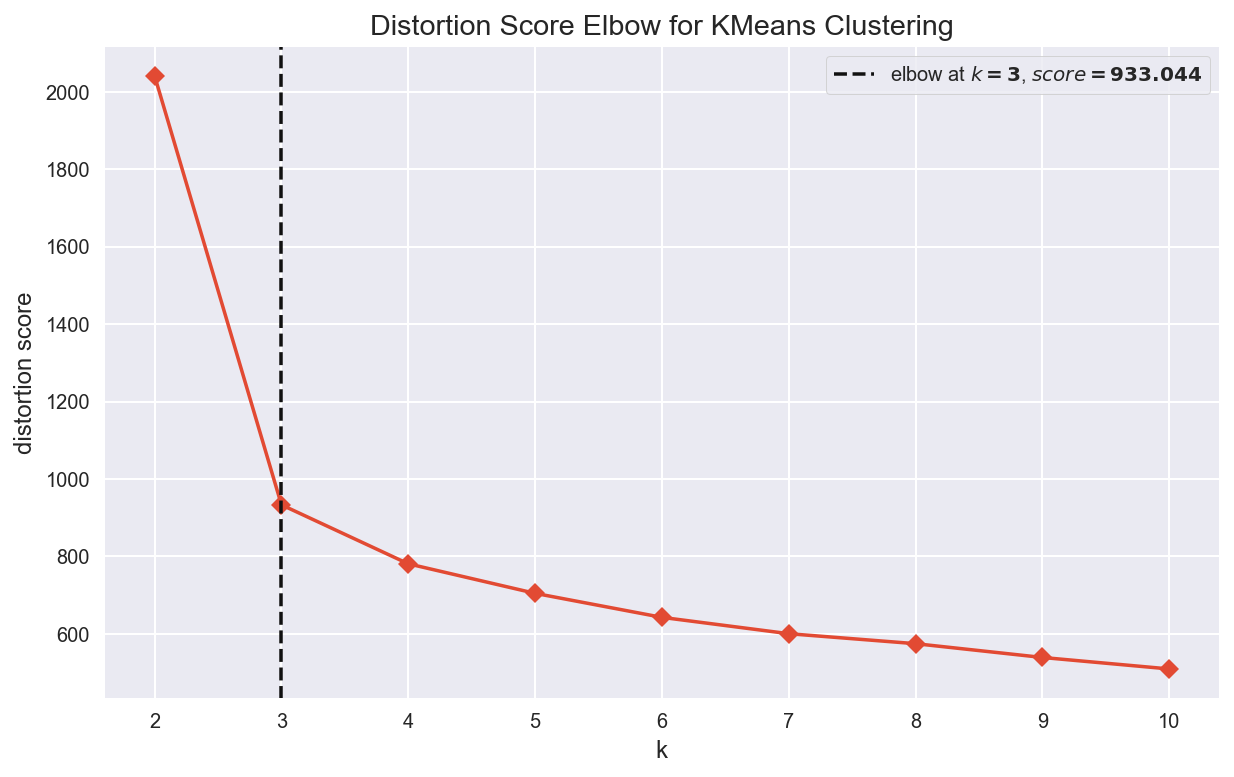

<IPython.core.display.Javascript object>

In [48]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)

plt.figure(figsize=(10, 6))
visualizer.fit(dataScaled)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure
plt.show()

## Manual calculation of the `'distortion score'`

Number of Clusters: 1 	Average Distortion: 2.0069222262503614
Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9426543606899347
Number of Clusters: 7 	Average Distortion: 0.9093991915419353
Number of Clusters: 8 	Average Distortion: 0.8843243844476886
Number of Clusters: 9 	Average Distortion: 0.8650832420580971
Number of Clusters: 10 	Average Distortion: 0.8411372125672628


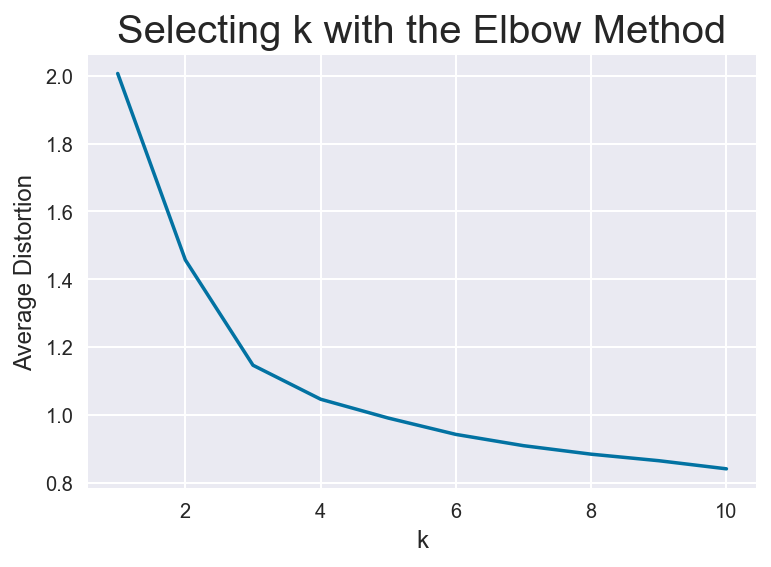

<IPython.core.display.Javascript object>

In [49]:
clusters = range(1, 11)
meanDistortions = []  # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)  # Initialize KMeans
    model.fit(dataScaled)  # Fit kMeans on the data
    prediction = model.predict(dataScaled)  # Predict the model on the data
    distortion = (
        sum(np.min(cdist(dataScaled, model.cluster_centers_, "euclidean"), axis=1))
        / dataScaled.shape[0]  # Find distortion
    )

    meanDistortions.append(
        distortion
    )  # Append distortion values to the empty list created above

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")  # Title of X-axis
plt.ylabel("Average Distortion")  # Title of y-axis
plt.title("Selecting k with the Elbow Method", fontsize=20)  # Title of the plot
plt.show()

* The way we can select the optimal number of clusters using the `average distortion` is finding the first lowest drop in that value.
* The drop between k=1 and k=2 in `average distortion` is 2.078359073508088 - 1.4670408415126168 = 0.6113.
* The drop between k=2 and k=3 in `average distortion` is 1.4670408415126168 - 1.1466276549150365 = 0.3204.
* The drop between k=3 and k=4 in `average distortion` is 1.1466276549150365 - 1.0471397905805744 = 0.0995.
* Therefore for this particular problem we found the first lowest drop is between k=3 and k=4, making `k=3` the optimal number of   
  clusters and confirming what we got from the `'yellowbrick'` library.

<h2><font color='blue', size="5"><strong>Check Silhouette Scores</strong></font></h2>

## KElbowVisualizer - `'silhouette'` score

### What is silhouette score?

Silhouette score is one of the methods for evaluating the quality of clusters created using clustering algorithms such as K-Means.    
The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).     
Silhouette score has a range of [-1, 1].

* Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. 
* Silhouette score near -1 indicate that those samples might have been assigned to the wrong cluster.

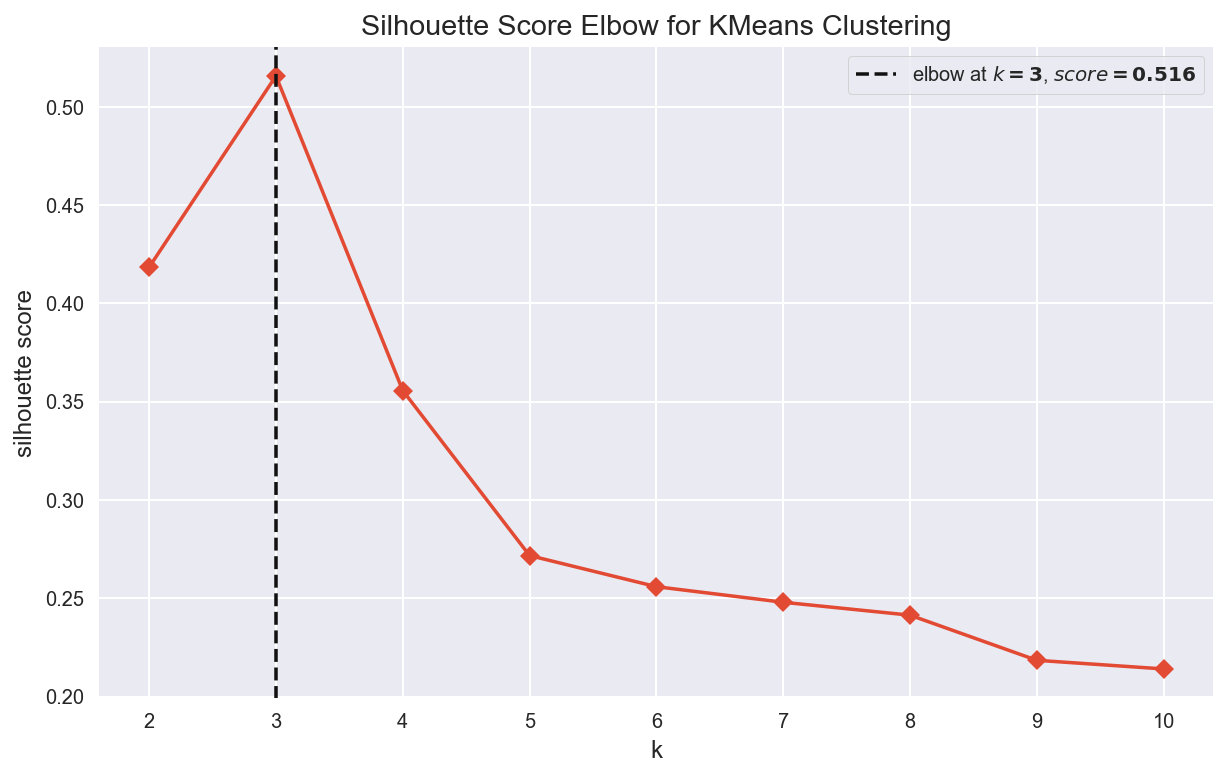

<IPython.core.display.Javascript object>

In [50]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 11), metric="silhouette", timings=False)

plt.figure(figsize=(10, 6))
visualizer.fit(dataScaled)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure
plt.show()

## Manual calculation of the `'silhouette score'`

For n_clusters = 2, silhouette score is 0.41842496663215445
For n_clusters = 3, silhouette score is 0.5157182558881063
For n_clusters = 4, silhouette score is 0.3556670619372605
For n_clusters = 5, silhouette score is 0.2717470361089752
For n_clusters = 6, silhouette score is 0.255906765297388
For n_clusters = 7, silhouette score is 0.24798644656011146
For n_clusters = 8, silhouette score is 0.2414240144760896
For n_clusters = 9, silhouette score is 0.2184645050755029
For n_clusters = 10, silhouette score is 0.21406586730833518


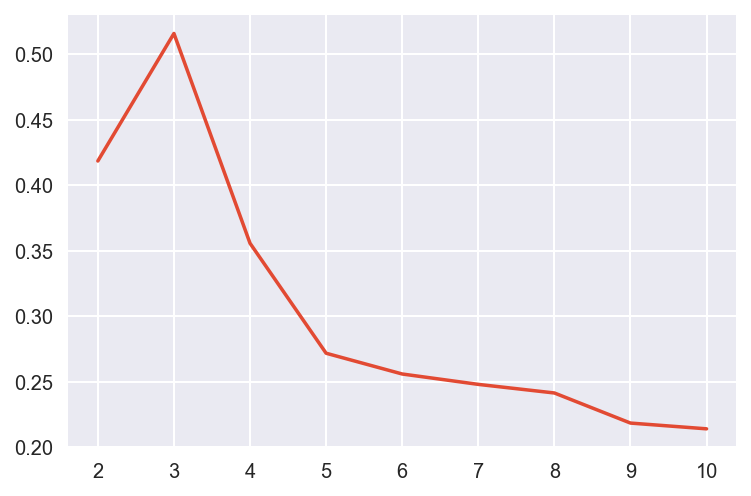

<IPython.core.display.Javascript object>

In [51]:
sil_score = []  # Create empty list
cluster_list = list(range(2, 11))  # Creating a list of range from 2 to 10
for n_clusters in cluster_list:
    clusterer = KMeans(
        n_clusters=n_clusters, random_state=1
    )  # Initializing KMeans algorithm
    preds = clusterer.fit_predict(dataScaled)  # Predicting on the data
    # centers = clusterer.cluster_centers_
    score = silhouette_score(dataScaled, preds)  # Cacalculating silhouette score
    sil_score.append(score)  # Appending silhouette score to empty list created above
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

* The manual calculation of the optimal `'k'` using the silhouette score matches the automatically    
  provided results by the `'yellowbrick'` library with a **silhouette score = 0.53977**.

<h2><font color='blue', size="5"><strong>Check calinski_harabasz Scores</strong></font></h2>

## KElbowVisualizer - `'calinski_harabasz'` score

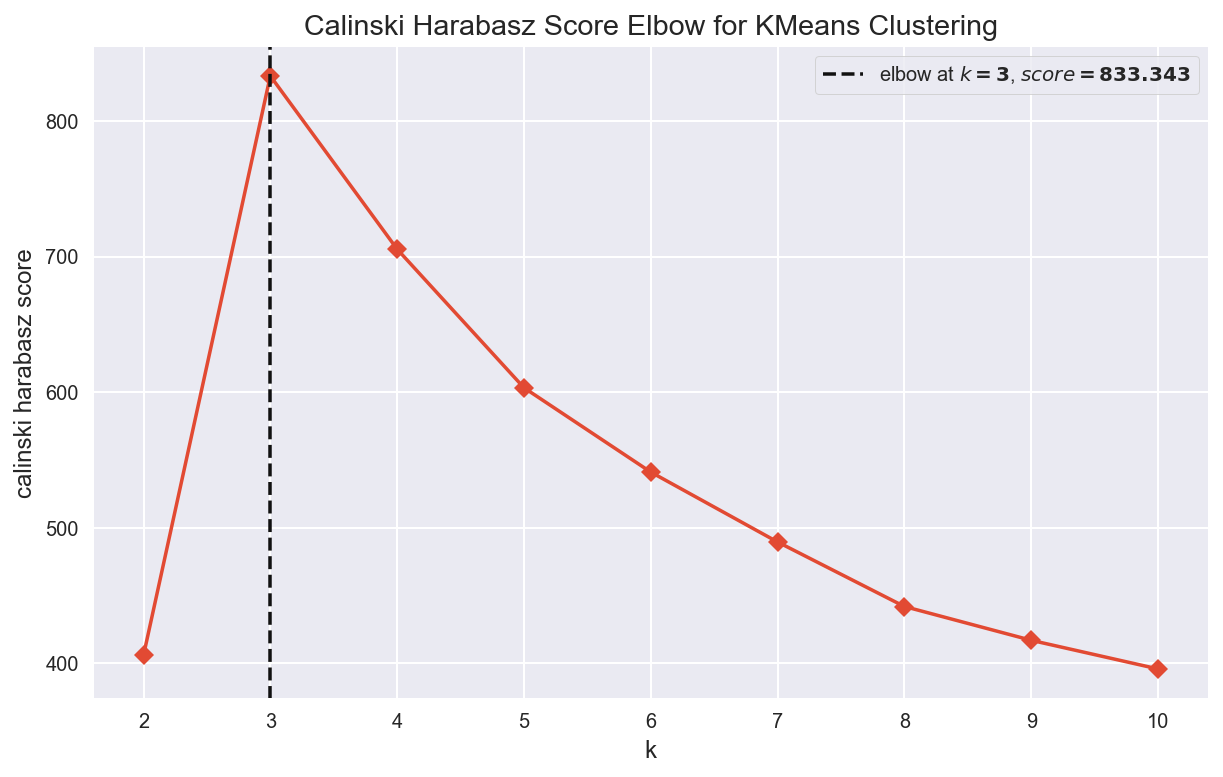

<IPython.core.display.Javascript object>

In [52]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(
    model, k=(2, 11), metric="calinski_harabasz", timings=False
)

plt.figure(figsize=(10, 6))
visualizer.fit(dataScaled)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure
plt.show()

<h2><font color='blue', size="5"><strong>Determining appropriate number of clusters</strong></font></h2>

* All three metrics (`'Distortion Score'`, `'Silhouette Score'`, and `'Calinski Harabasz'`) using     
  the `'yellowbrick'` library and the `'manual calculation'` for the `'Elbow method'` gives the same optimal number of cluster k = 3.

In [53]:
# Let us set the final model using K = 3
final_model = KMeans(n_clusters=3, random_state=1)
final_model.fit(dataScaled)
prediction = final_model.predict(dataScaled)

# adding kmeans cluster labels to the original dataframe
data["GROUP"] = prediction

# adding kmeans cluster labels to the Scaled dataframe
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")

# printing the original dataframe with clusters included
data.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2


<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Cluster Profiling</strong></font></h2>

* Cluster profiles inform you about the characteristics of different variables with respect to each cluster.
* This can be done by first grouping the data based on the clusters formed, and then checking the summary statistics   
  of the variables or visualizing the variable distributions for each group to gain insights.

In [54]:
data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,2
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,2
656,657,60732,84000,10,1,13,2,2
657,658,53834,145000,8,1,9,1,2
658,659,80655,172000,10,1,15,0,2


<IPython.core.display.Javascript object>

In [55]:
cluster_profile = data[num_col + ["GROUP"]].groupby("GROUP").mean()

<IPython.core.display.Javascript object>

In [56]:
cluster_profile["count_in_each_segment"] = (
    data[num_col + ["GROUP"]].groupby("GROUP")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [57]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
GROUP,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


<IPython.core.display.Javascript object>

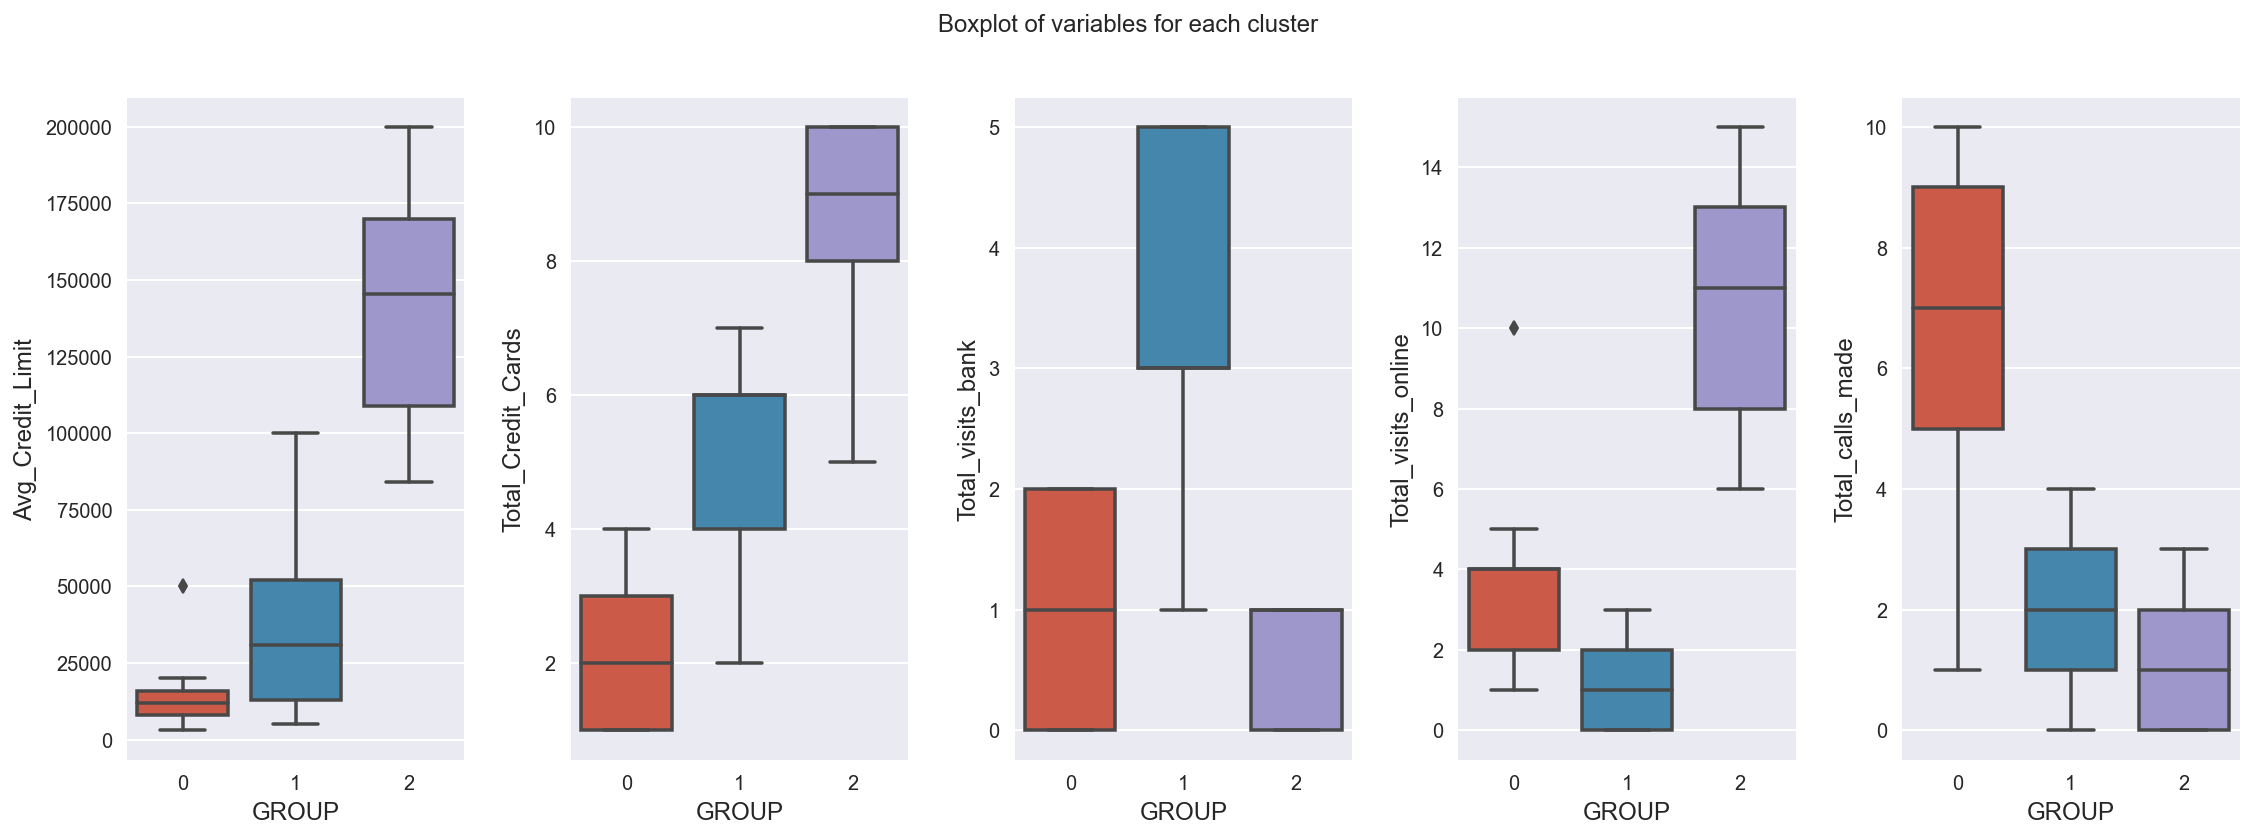

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of variables for each cluster")
counter = 0
for idx in range(5):
    sns.boxplot(ax=axes[idx], y=data[num_col[counter]], x=data["GROUP"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

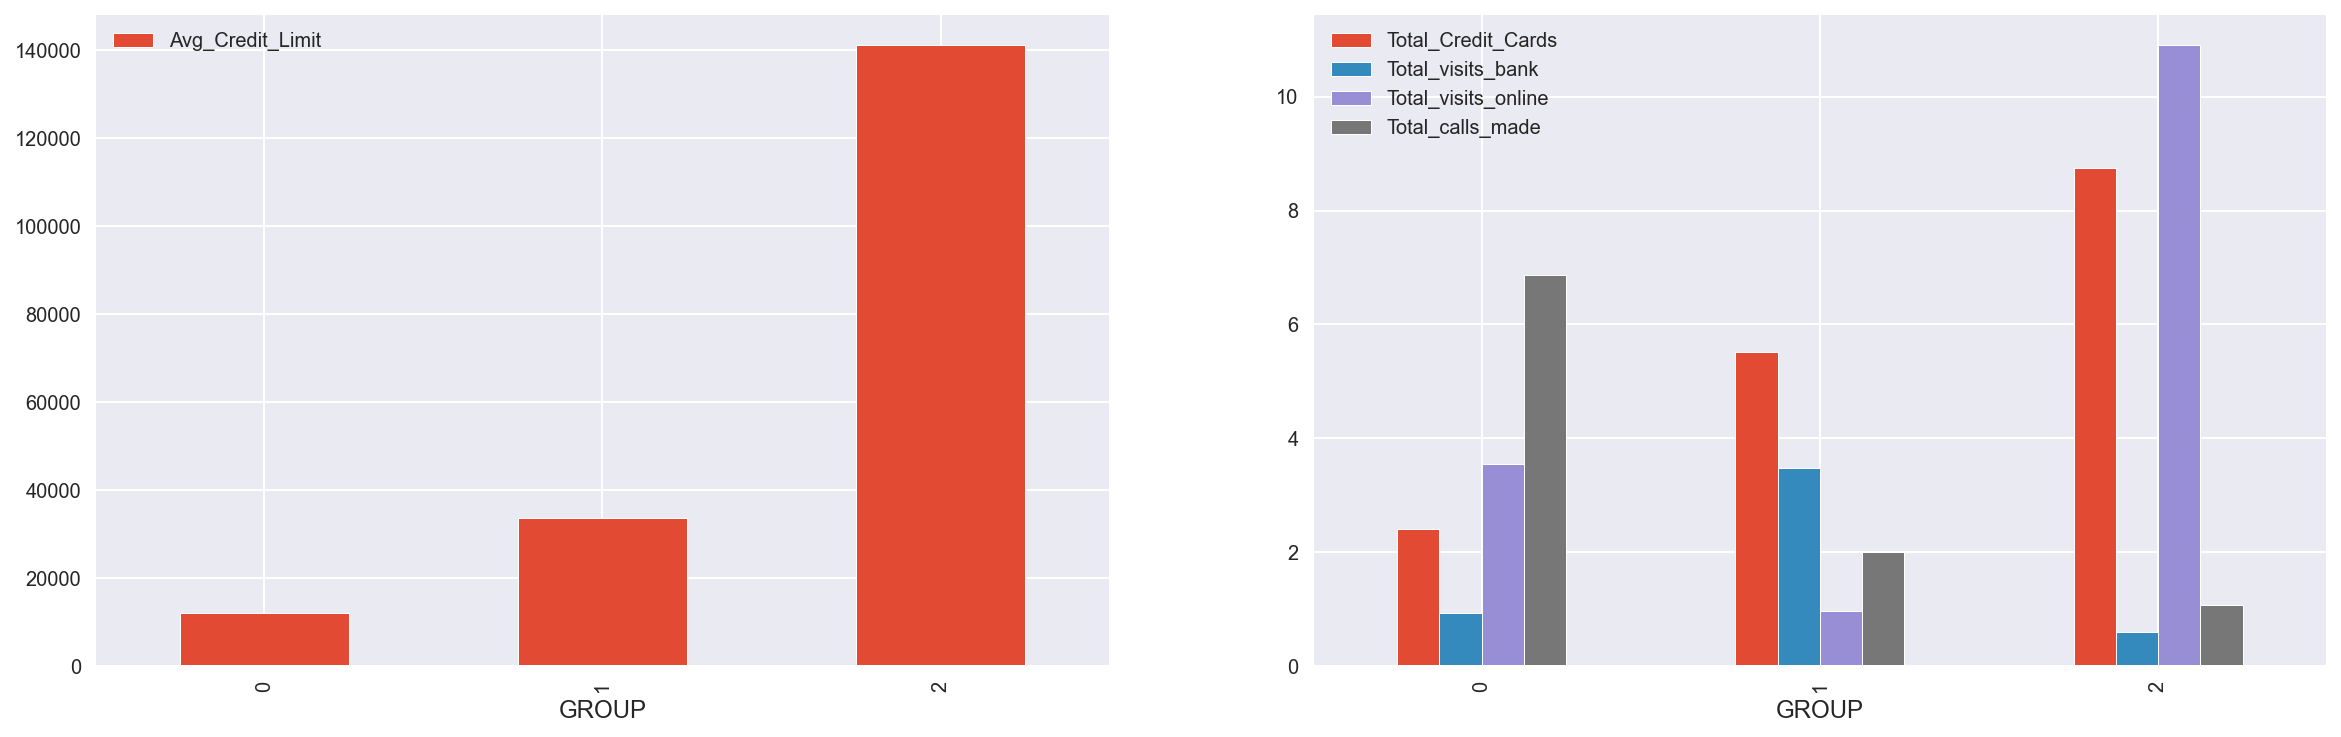

<IPython.core.display.Javascript object>

In [59]:
# plot featurea per GROUP in separate plots as `Avg_Credit_Limit` may shadow the other features due to magnitude of values.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
data[num_col[:1] + ["GROUP"]].groupby("GROUP").mean().plot.bar(ax=ax1)
data[num_col[1:] + ["GROUP"]].groupby("GROUP").mean().plot.bar(ax=ax2)
plt.show()

## Observations

* The boxplot and bar plot previously pictured for all variables per `'GROUP'` provides an analogous view of the customer base.
* The median of the `'Avg_Credit_Limit'` in **GROUP = 2** is several orders of magnitude higher compared to other `'GROUP's` (see Avg_Credit_Limit plot above).
* The `'Total_Credit_Cards'` feature is also a predominant feature in **GROUP = 2**, also the feature `'Total_visits_online'` is also well relevant in **GROUP = 2**.   
* Having said this this **GROUP = 2** makes it a good candidate for `'upselling'` services due to their purchasing power.
* For the **GROUP = 1** we may want to `'focus'` more in improving their online interaction through a program that better rewards their online experience.  
  They do have a modest `'purchasing power'` around 35K in average and a good number of `'credit cards'` so we can levearge this attibute to provide them with an improved online experience.
* For the **GROUP = 0** we suggest to improve support services as the number of `'Total_calls_made'` maybe is a signal this customers are perceiving it as poorly attended/supported.

<h1><font color='darkgreen', size="6"><strong>Applying Hierarchical Clustering</strong></font></h1>

<h2><font color='blue', size="5"><strong>Apply Hierarchical clustering with different linkage methods</strong></font></h2>

### Cophenetic Correlation Coefficient

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree,   
and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original   
unmodeled data points.

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined.   
That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms.

In [60]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(dataScaled, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(dataScaled))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, round(c, 8)
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.89817911.
Cophenetic correlation for Euclidean distance and complete linkage is 0.88442073.
Cophenetic correlation for Euclidean distance and average linkage is 0.91026911.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.90699993.
Cophenetic correlation for Chebyshev distance and single linkage is 0.81420044.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.85653607.
Cophenetic correlation for Chebyshev distance and average linkage is 0.90922486.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.90466615.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8650806.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.61005107.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.84192953.
Cophenetic correlation for Mahalanobis distance and weighted linkage is 0.85931037.
Cophenetic correla

<IPython.core.display.Javascript object>

In [61]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9102691112621796, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Checking cophenetic correlation for each linkage method (Euclidean distance)</strong></font></h2>

**Let's explore different linkage methods with Euclidean distance only.**

In [62]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(dataScaled, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(dataScaled))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, round(c, 8)))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.89817911.
Cophenetic correlation for complete linkage is 0.88442073.
Cophenetic correlation for average linkage is 0.91026911.
Cophenetic correlation for centroid linkage is 0.90684526.
Cophenetic correlation for ward linkage is 0.75662527.
Cophenetic correlation for weighted linkage is 0.90699993.


<IPython.core.display.Javascript object>

In [63]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9102691112621796, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

<h2><font color='blue', size="5"><strong>Plot dendrograms for each linkage method</strong></font></h2>

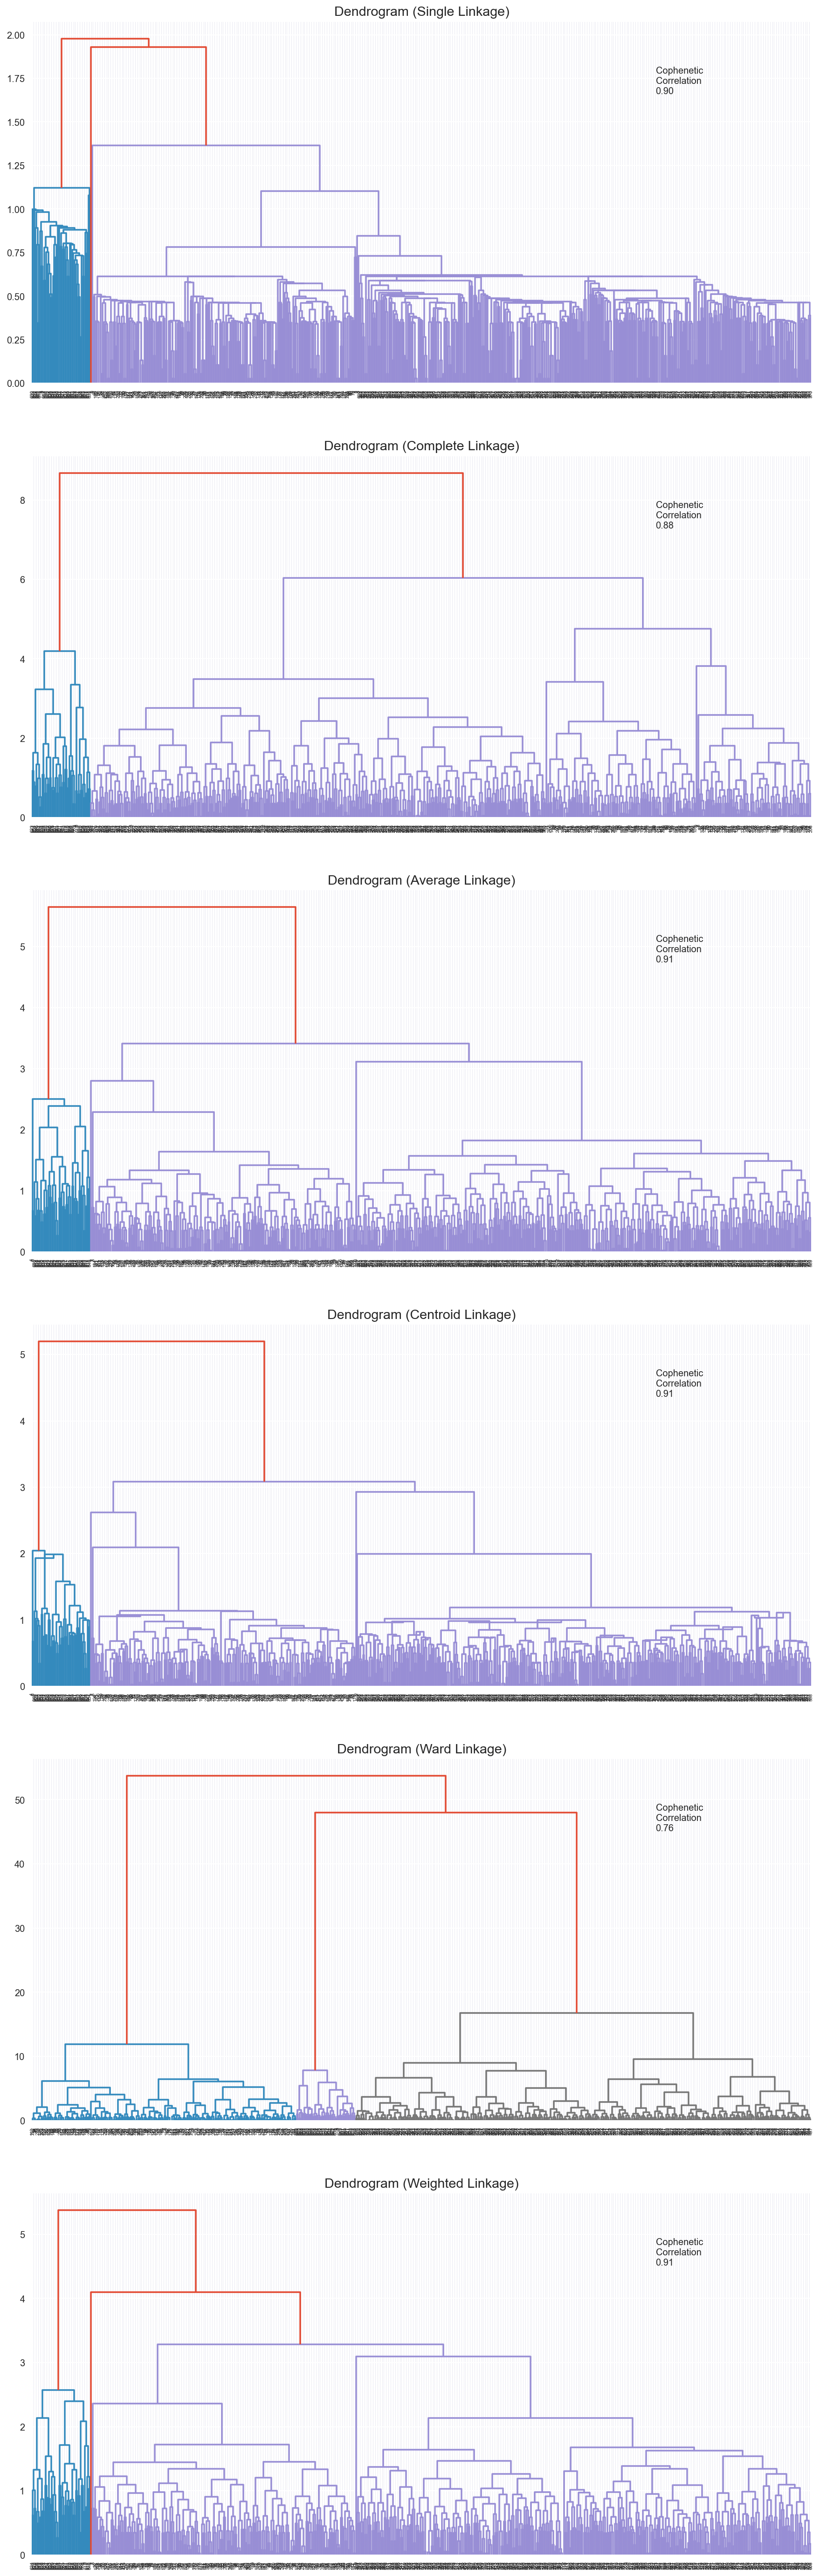

<IPython.core.display.Javascript object>

In [64]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 50))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(dataScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(dataScaled))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

<h2><font color='blue', size="5"><strong>Determining appropriate number of clusters</strong></font></h2>

* The most homogeneous and uniform set of clusters are pictured using **`'average linkage'`** with a `'cophenetic score'` of **0.91**.

* The optimal number of clusters using this hierarchical clustering technique is giving us **k = 3** as more appropriate.

**Note:**

* The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster   
  tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters. The dendrogram   
  for average linkage had the highest cophenetic correlation. So we can use **average linkage** and have chosen 3 clusters as the dendrogram  
  height is pretty high.

**Lets visualize the dendrogram cut for average link in the below plot.**

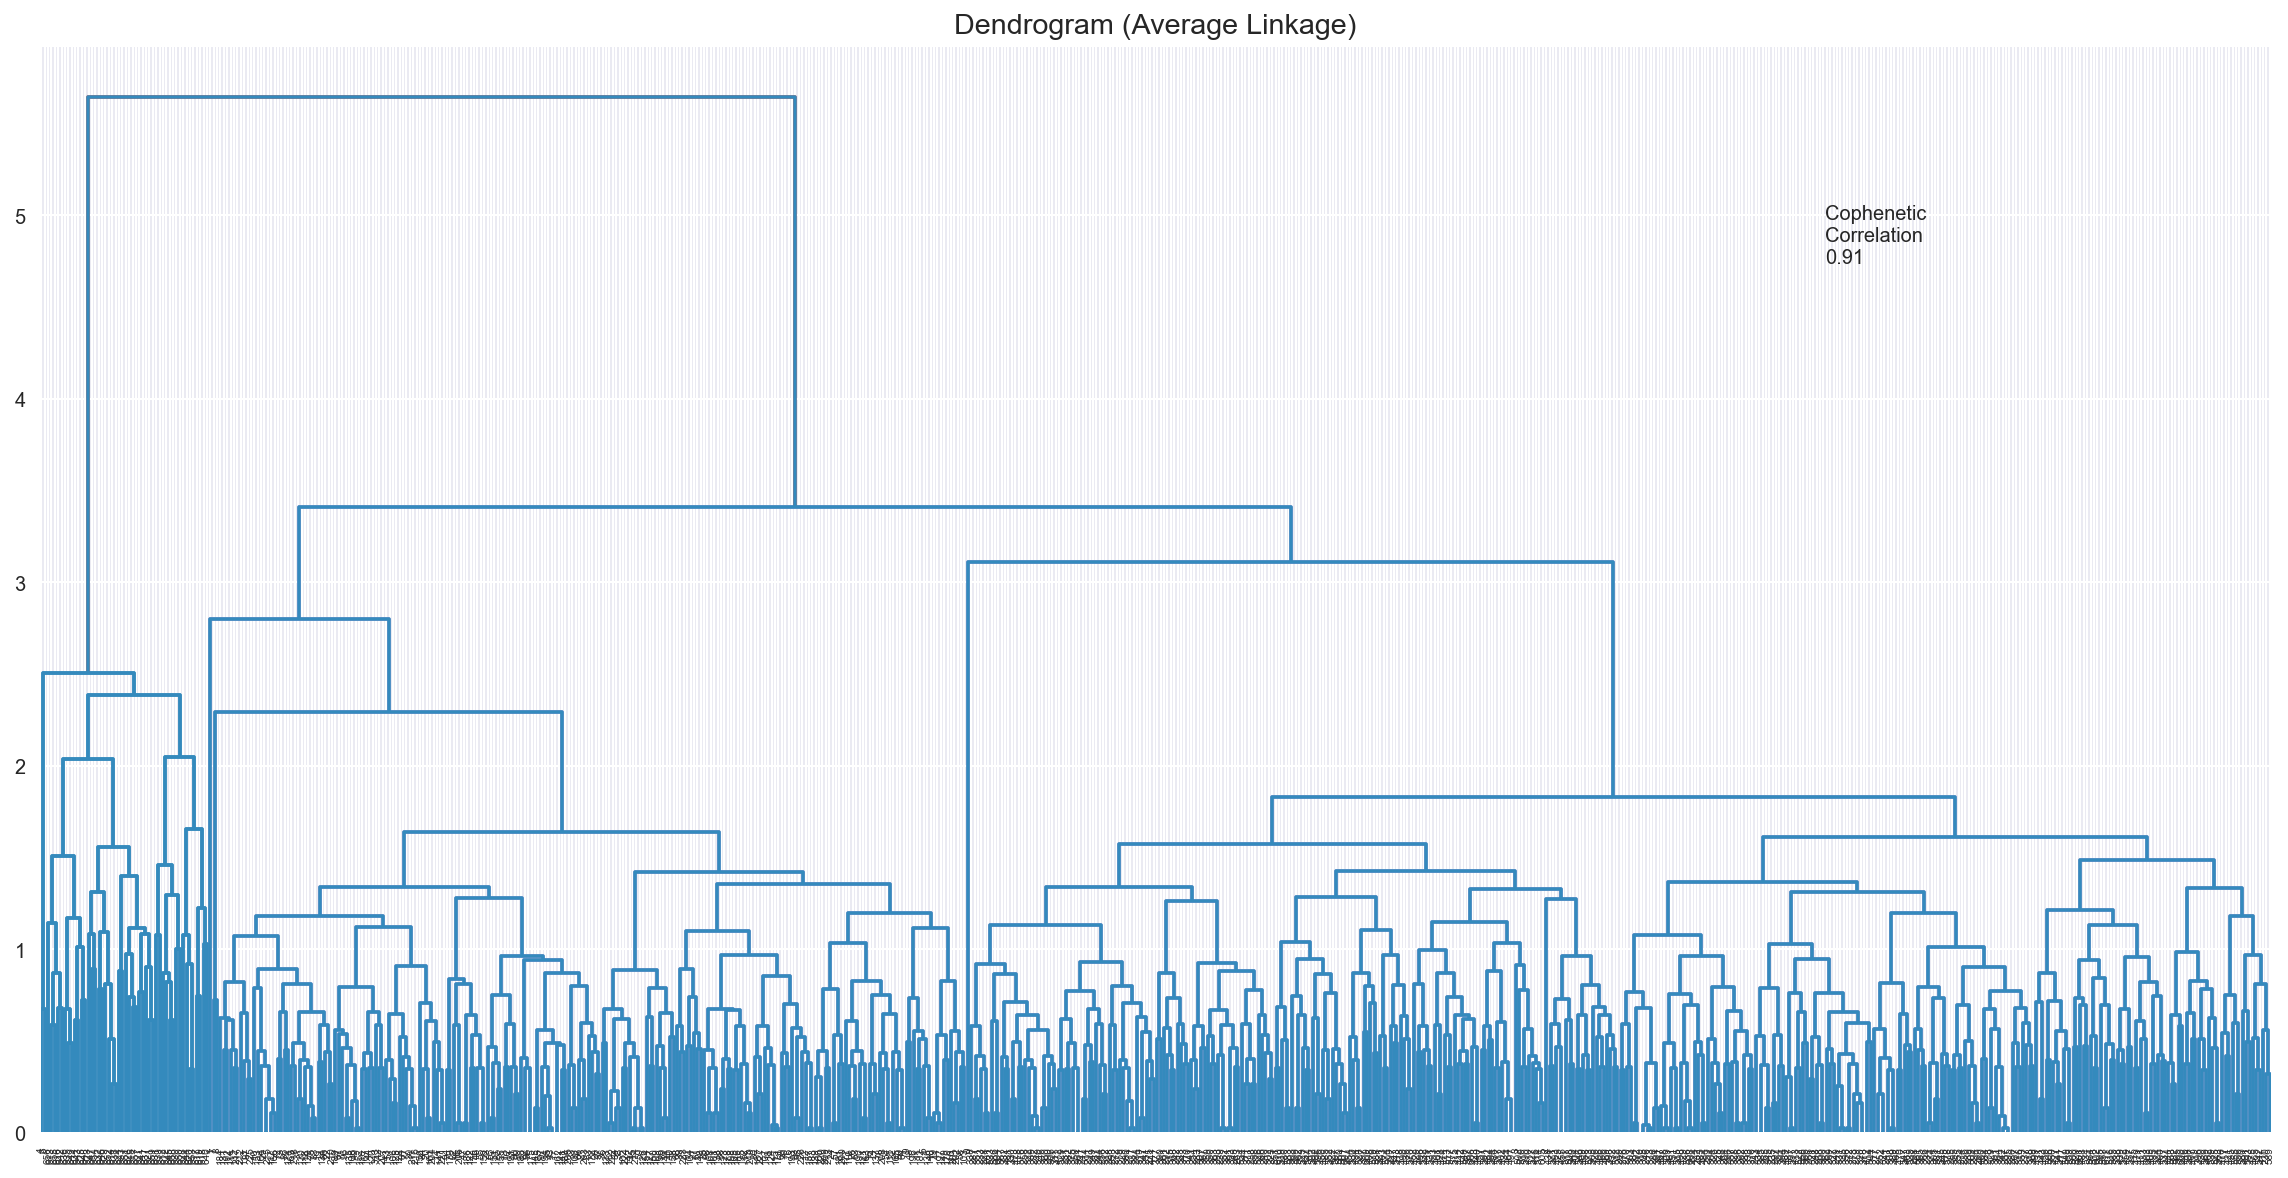

<IPython.core.display.Javascript object>

In [65]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(20, 10))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(dataScaled, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(dataScaled))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")
plt.show()

# Hierarchical Clustering

In [66]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(dataScaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

<IPython.core.display.Javascript object>

In [67]:
dataScaled["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

<h2><font color='blue', size="5"><strong>Cluster Profiling</strong></font></h2>

In [68]:
cluster_profile = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [69]:
cluster_profile["count_in_each_segment"] = (
    data[num_col + ["HC_Clusters"]]
    .groupby("HC_Clusters")["Avg_Credit_Limit"]
    .count()
    .values
)

<IPython.core.display.Javascript object>

In [70]:
data.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made', 'GROUP',
       'HC_Clusters'],
      dtype='object')

<IPython.core.display.Javascript object>

In [71]:
# let's see the names of the customers in each cluster
for cl in data["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(data[data["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 0, the following customers are present:
[87073 17341 40496 54838 35254 46635 97825 83125 35483 15129 83290 56486 31903 45909 14263 46813
 81878 35549 85799 39122 81531 69965 18595 44398 32352 40898 27101 33457 45088 23302 27408 65372
 21531 56843 17165 89328 20072 71402 47496 24808 17036 67193 34423 97109 55382 51811 53936 66504
 53207 18514 51319 36340 36934 95925 49771 22919 21233 74544 52025 45652 73952 49418 77026 49331
 75775 54906 94666 11698 34677 95610 41380 38033 85337 38994 67911 92956 77641 57565 53814 30712
 19785 31384 16374 50878 78002 83459 91987 51552 24998 45673 11596 87485 28414 81863 33240 11466
 23881 44645 49844 92782 22824 26767 26678 50412 17933 34495 47437 22610 41159 64672 62483 85614
 96548 19137 69028 70779 38244 67046 64897 46223 36628 17565 77381 11799 81940 66706 87838 94437
 33790 44402 29886 66804 47866 61996 15318 89635 71681 71862 96186 22348 36243 88807 82376 98126
 80347 17649 62807 92522 57459 44579 45476 61994 11398 24702 27824 45878 724

<IPython.core.display.Javascript object>

In [72]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,count_in_each_segment
HC_Clusters,,,,,,,,,
0,417.528497,54881.329016,33782.383420,5.515544,3.489637,0.981865,2.000000,1.000000,386
1,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000,2.000000,50
2,117.857143,55239.830357,12174.107143,2.410714,0.933036,3.553571,6.870536,0.000000,224


<IPython.core.display.Javascript object>

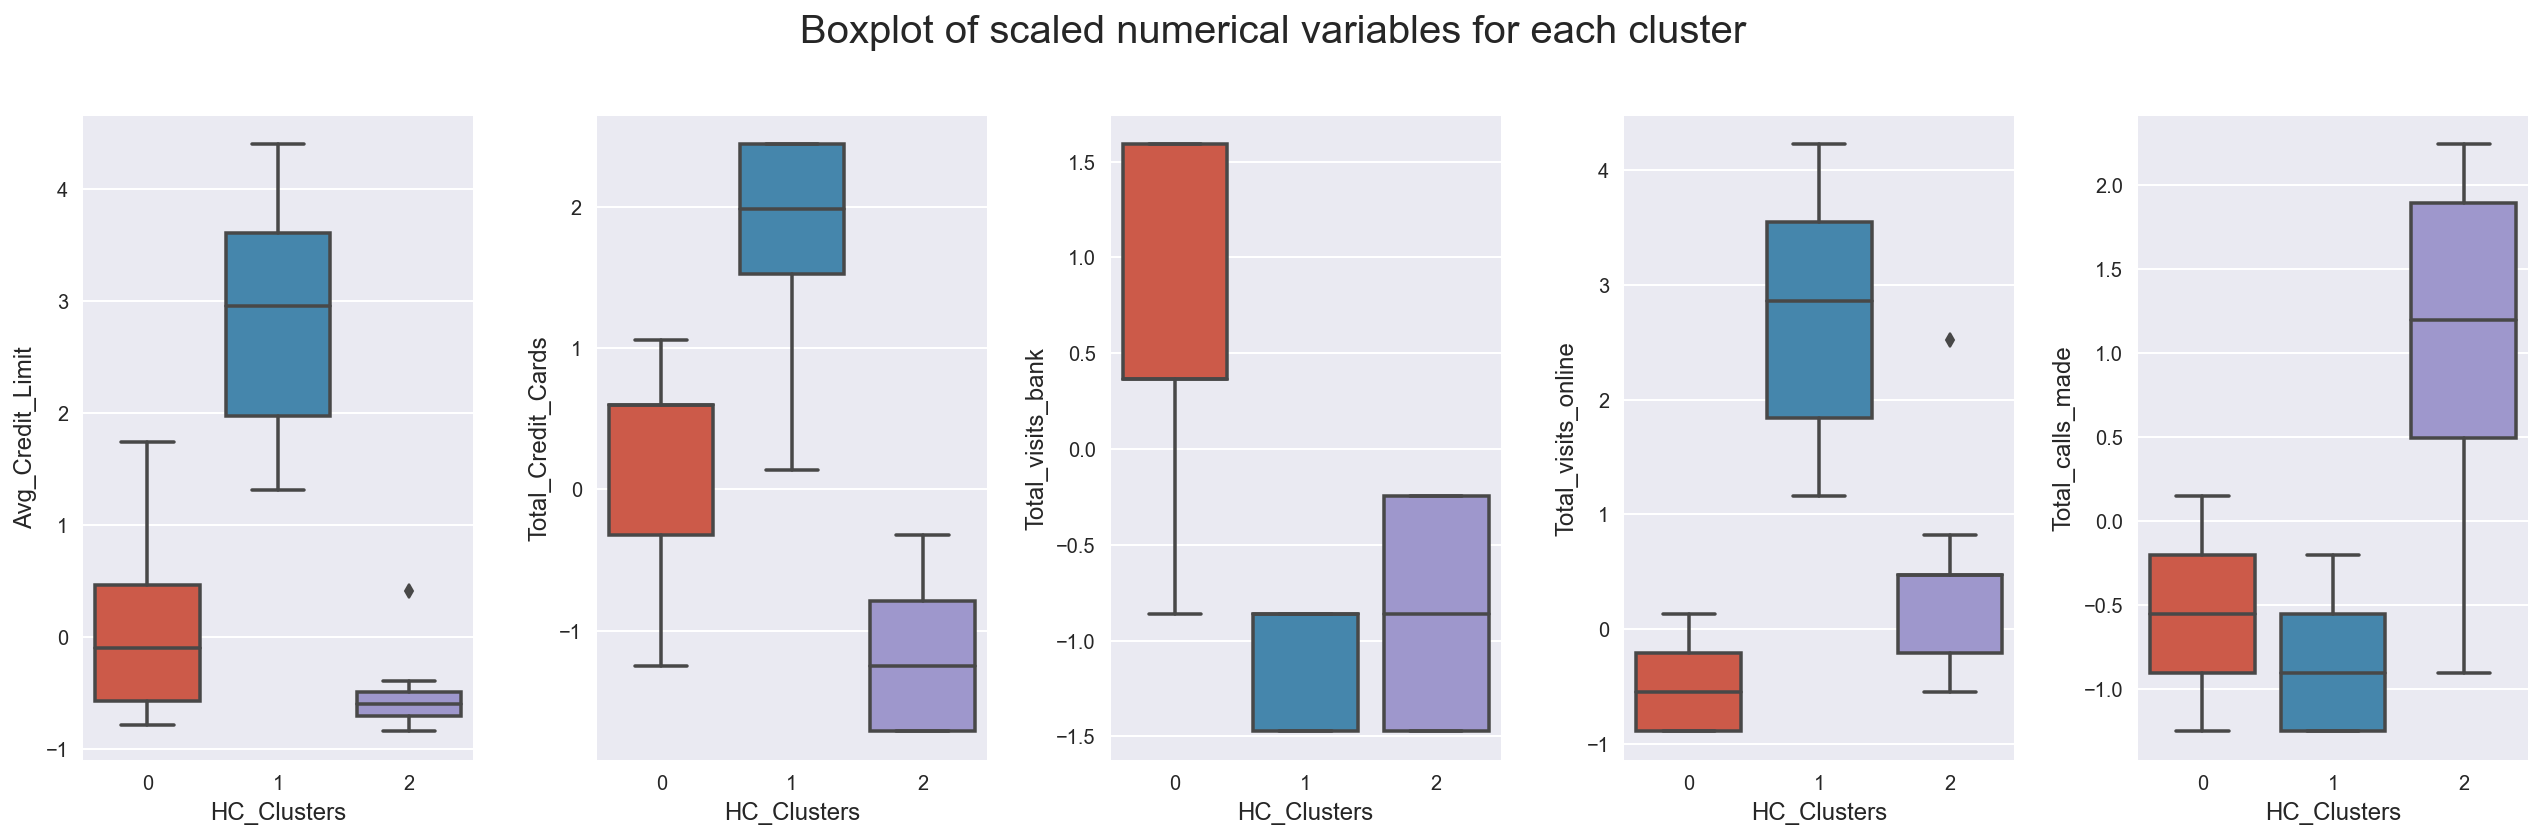

<IPython.core.display.Javascript object>

In [73]:
nrows = 1
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for idx in range(len(num_col)):
    sns.boxplot(
        ax=axs[idx],
        y=dataScaled[num_col[idx]],
        x=dataScaled["HC_Clusters"],
    )

fig.tight_layout(pad=2.0)
plt.show()

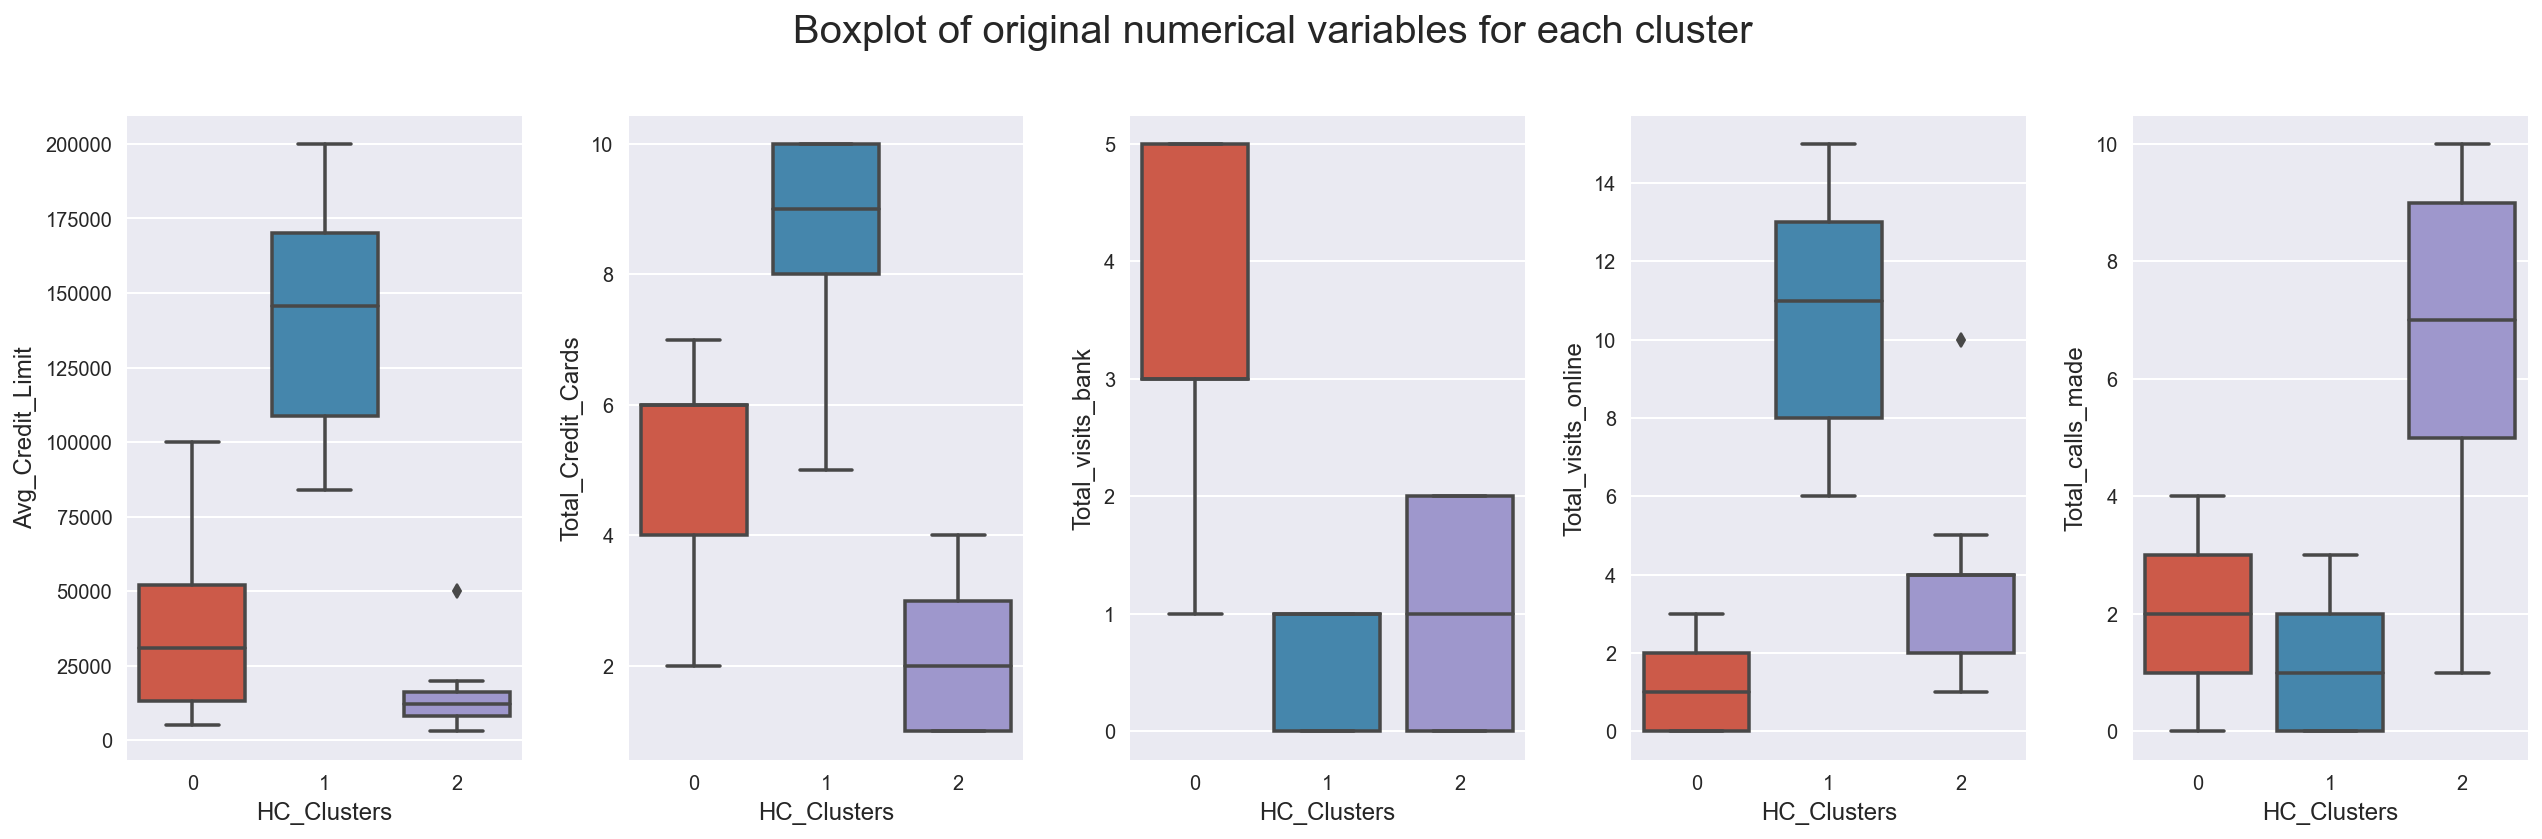

<IPython.core.display.Javascript object>

In [74]:
nrows = 1
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for idx in range(len(num_col)):
    sns.boxplot(
        ax=axs[idx],
        y=data[num_col[idx]],
        x=data["HC_Clusters"],
    )

fig.tight_layout(pad=2.0)
plt.show()

<h1><font color='darkgreen', size="6"><strong>K-means vs Hierarchical Clustering</strong></font></h1>

Compare clusters obtained from K-means and Hierarchical clustering techniques

* The hierarchical agglomerative cluster requires interpreting the dendrogram to obtain a desired number of clusters. With the K-means we now have scoring criteria we can get automated   
  number of clusters where the scoring criteria makes the selection optimal. This can be done using the library `'yellowbrick'` that uses `'distortion'`, `'silhouette'`, and/or   
  `'calinski_harabasz'` scores. In our case all of the three metrics provided the same number of **`'K' = 3`**.   


* In our study although we have a cophenetic correlation factor for the hierarchical clustering, we still need to select where we want to cut the tree to obtain the number of clusters.   
  For the selected observed dendrogram (average linkage) with Euclidean distance we saw the cut at 3 clusters provided a more homogeneous and uniform number of clusters than with   
  another cut height. So, in essence the selection of the number of clusters is guided by the calkculation of cophenetic correlation factor and decided by a visual inspection of the dendrogram.   
  
  
* I am personaly inclined to use K-Means even though results from Hierarchical clustering are always reproducible, while with k-means this may not the be case all time due to the random   
  initialization of the centroids at the beginning. K-means is quicker and easy to setup. Hierarchical clustering is a bit more laborious and require more closer study of the results.


<h2><font color='darkgreen', size="6"><strong>Dimensionality Reduction using PCA for visualization</strong></font></h2>

Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [75]:
# setting the number of components to 3
pca = PCA(n_components=3)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(dataScaled)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2", "Component 3"]
)

<IPython.core.display.Javascript object>

In [76]:
# checking the amount of variance explained
pca.explained_variance_ratio_[:2].sum(), pca.explained_variance_ratio_[:3].sum()

(0.8445293867984172, 0.896287943810202)

<IPython.core.display.Javascript object>

* The first 2 principal components explains 84.45% of the data variability and the first 3 principal components explain 89.62% of the data variability.

Let's colour the scatterplot by cluster labels for principal Components 1 and 2.

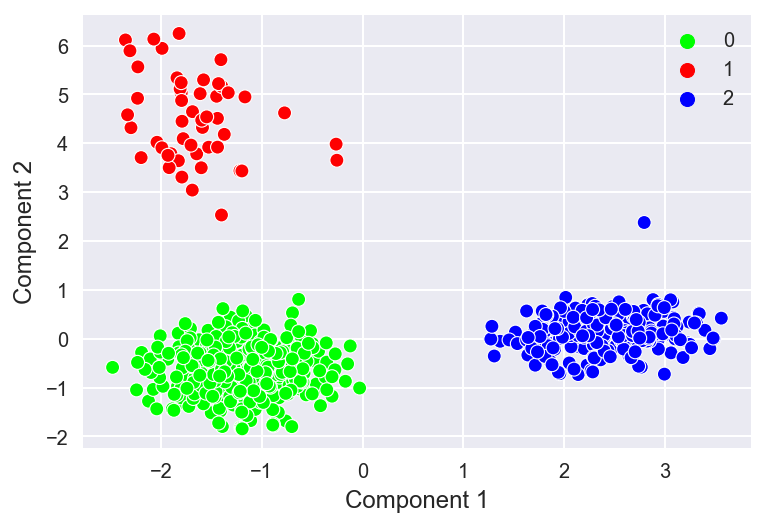

<IPython.core.display.Javascript object>

In [77]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data["HC_Clusters"],
    palette="brg_r",
)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

* Clusters **0** (<font color='green'><strong>green</strong></font>), and **2** (<font color='blue'><strong>blue</strong></font>) are the major clusters.
* There are a few outliers in clusters **1** (<font color='red'><strong>red</strong></font>) and **2** (<font color='blue'><strong>blue</strong></font>).
* Cluster **0** (<font color='green'><strong>green</strong></font>) seems to be the most dense cluster and cluster **1** (<font color='red'><strong>red</strong></font>) the less.

<h1><font color='darkgreen', size="6"><strong>Actionable Insights & Recommendations</strong></font></h1>

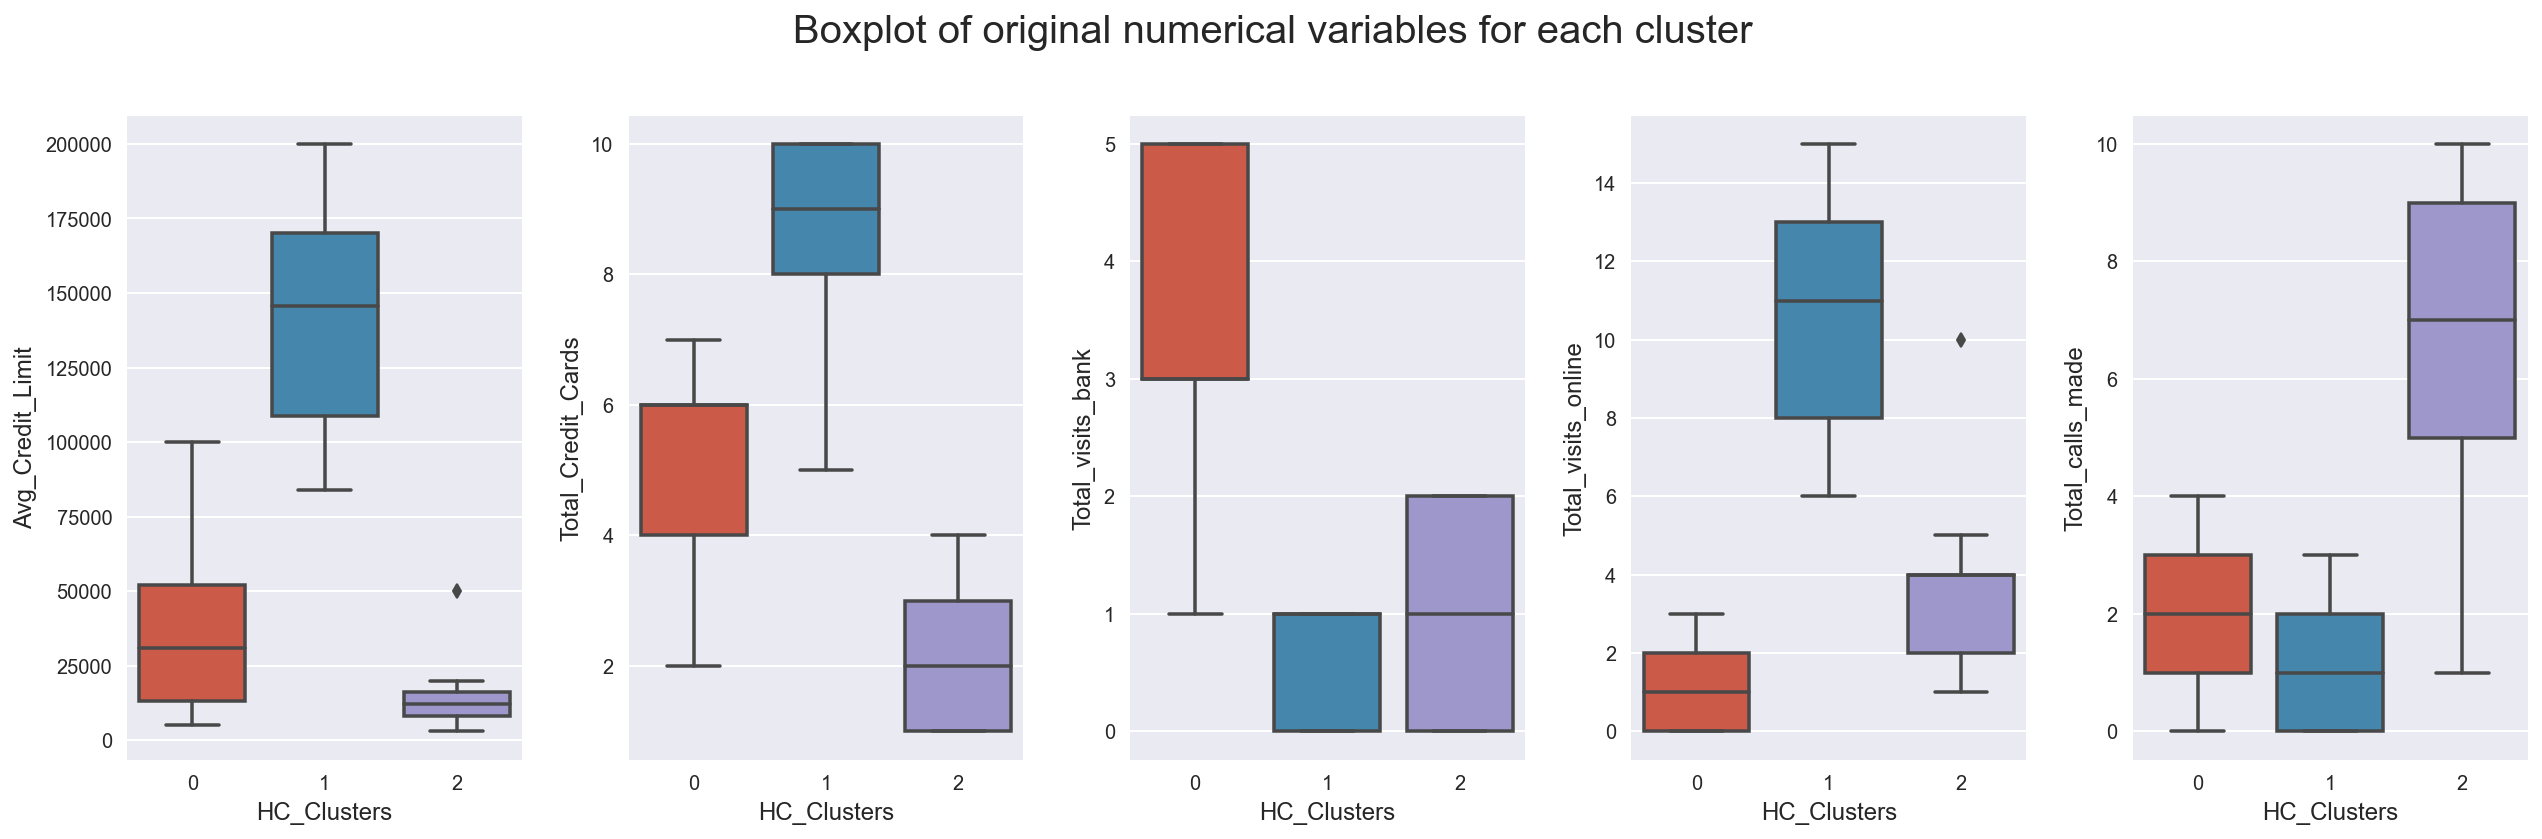

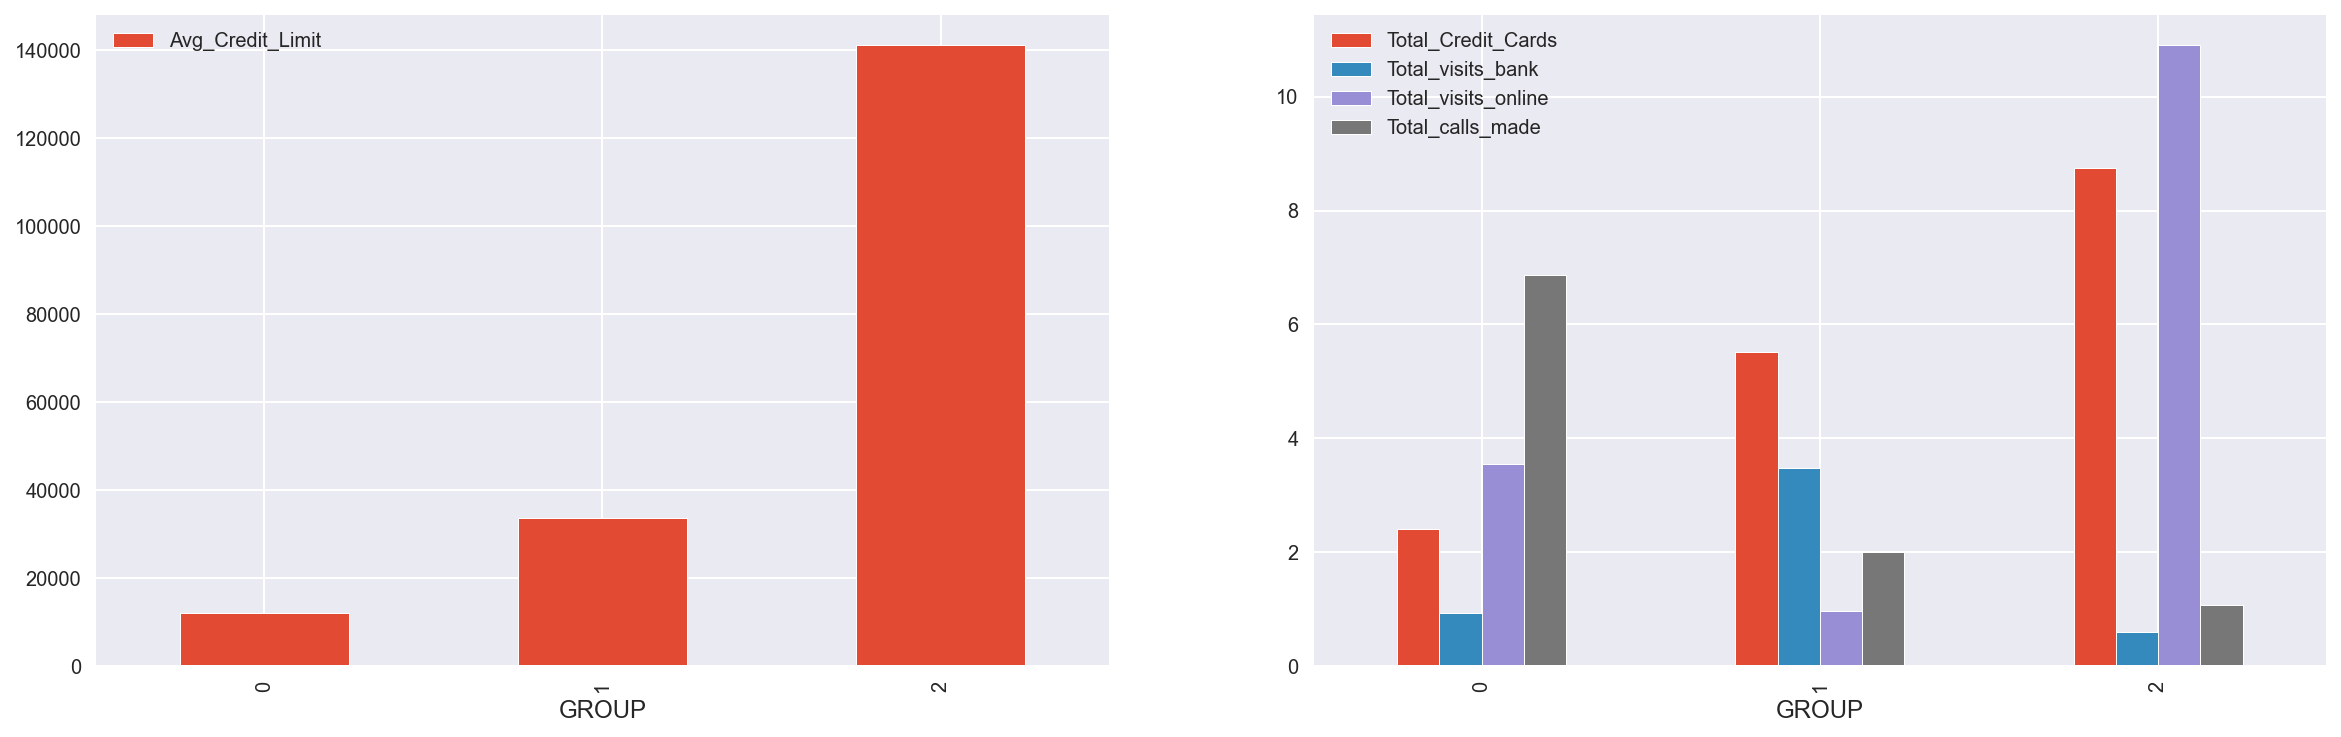

<h2><font color='blue', size="5"><strong>Key takeaways for the business</strong></font></h2>

* The boxplot and bar plot previously pictured for all variables per **`'GROUP'`** provides an analogous view of the customer base although they differ in the numeration of the defining clusters.
* The equivalence of the two approaches **hierarchical** and **centroid based** in terms of matching cluster numbers are:   

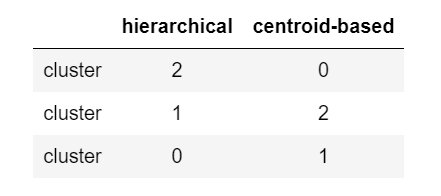
    
  
* The median of the `'Avg_Credit_Limit'` in **`GROUP` = 2** is several orders of magnitude higher compared to other **`'GROUP's`** (see Avg_Credit_Limit plot above).
* The `'Total_Credit_Cards'` feature is also a predominant feature in **`GROUP` = 2**, also the feature `'Total_visits_online'` is also well relevant in **`GROUP` = 2**.   
* Having said this this **`GROUP` = 2** makes it a good candidate for `'upselling'` services due to their purchasing power.
* For the **`GROUP` = 1** we may want to `'focus'` more in improving their online interaction through a program that better rewards their online experience.  
  They do have a modest `'purchasing power'` around 35K in average and a good number of `'credit cards'` so we can levearge this attibute to provide them with an improved online experience.
* For the **`GROUP` = 0** we suggest to improve support services as the number of `'Total_calls_made'` maybe is a signal this customers are perceiving it as poorly attended/supported.

<h2><font color='blue', size="5"><strong>Recommendations to the business</strong></font></h2>

* Direct `'marketing campaigns'` on **`GROUP` = 0** and **`GROUP` = 1** with the objective of providing an **`'improved customer support'`** through   
  a revamped `'service delivery model'` and a **`'rewarding online experience'`** _**respectively**_.
  

* Focus the `'upselling campaign'` on **`GROUP` = 2** which has the best `'purchasing power'` and rewards their experience with the bank   
  through **`'custom-tailored incentive programs'`**. 